Encoder : 5 LSTM  
Decoder : 5 LSTM  
Epochs : 10000  
Hidde layer : 2000  
Past : 40  
Future : 20

In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import LSTM, RepeatVector,TimeDistributed, Dense, Input

            Robberies
Month                
1966-01-01         41
1966-02-01         39
1966-03-01         50
1966-04-01         40
1966-05-01         43


<Axes: xlabel='Month'>

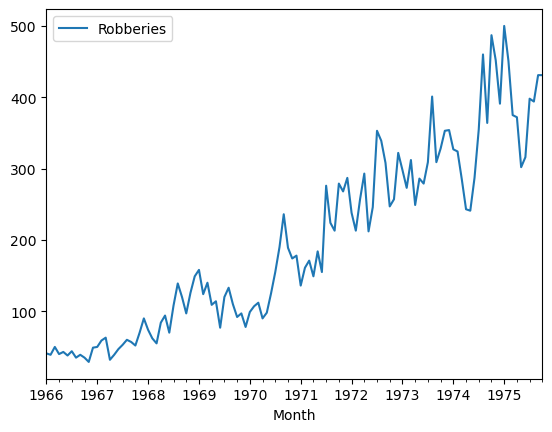

In [4]:

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-robberies.csv")
df["Month"] = pd.to_datetime(df["Month"])
df = df.set_index("Month")
print(df.head())
df.plot()

In [5]:
max_value = max(df['Robberies'])
min_value = min(df['Robberies'])

def normalize_data(data):
    return (data - min_value) / (max_value - min_value)

def denormalize_data(data):
    return data * (max_value - min_value) + min_value

normalized_df = normalize_data(df['Robberies'])

n_features = 1
n_future = 20
n_past = 40

x = []
for i in range(len(normalized_df) - n_past + 1 - n_future):
    window = normalized_df.iloc[i:i+n_past].to_numpy().reshape(-1, 1)
    x.append(window)
x = np.array(x)

y = []
for i in range(n_future, len(normalized_df) - n_past + 1):
    window = normalized_df.iloc[i:i+n_future].to_numpy().reshape(-1, 1)
    y.append(window)
y = np.array(y)

train_size = 0.8
validation_size = 0.1
test_size = 0.1

indices = np.arange(min(len(x),len(y)))
np.random.shuffle(indices)
train_index = int(train_size * len(indices))
val_index = int((train_size + validation_size) * len(indices))

train_indices = indices[:train_index]
val_indices = indices[train_index:val_index]
test_indices = indices[val_index:]

x_train, y_train = x[train_indices], y[train_indices]
x_val, y_val = x[val_indices], y[val_indices]
x_test, y_test = x[test_indices], y[test_indices]

print("Number of samples in training set:", len(x_train))
print("Number of samples in validation set:", len(x_val))
print("Number of samples in test set:", len(x_test))

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

Number of samples in training set: 47
Number of samples in validation set: 6
Number of samples in test set: 6
(47, 40, 1)
(6, 40, 1)
(6, 40, 1)


2024-03-10 18:13:46.782563: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-10 18:13:46.787329: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-10 18:13:46.790499: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 40, 2000)       │    16,016,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 40, 2000)       │    32,008,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 40, 2000)       │    32,008,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 40, 2000)       │    32,008,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 40, 2000)       │    32,008,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 2000)           │    32,008,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 20, 2000)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 20, 2000)       │    32,008,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 20, 2000)       │    32,008,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 20, 2000)       │    32,008,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 20, 2000)       │    32,008,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 20, 2000)       │    32,008,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 20, 1)          │         2,001 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 336,098,001 (1.25 GB)

 Trainable params: 336,098,001 (1.25 GB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000


2024-03-10 18:15:09.738923: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.1401 - val_loss: 0.0274
Epoch 2/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0841 - val_loss: 252.1804
Epoch 3/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 249.5987 - val_loss: 0.0503
Epoch 4/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1218 - val_loss: 0.0616
Epoch 5/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1397 - val_loss: 0.0623
Epoch 6/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1408 - val_loss: 0.0598
Epoch 7/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1369 - val_loss: 0.0560
Epoch 8/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1312 - val_loss: 0.0512
Epoch 9/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1238 - val_loss: 0.0450
Epoch 10/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1141 - val_loss: 0.0365
Epoch 11/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0998 - val_loss: 0.0231
Epoch 12/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0737 - val_loss: 0.01

Epoch 70/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0148 - val_loss: 0.0068
Epoch 71/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0090 - val_loss: 0.0055
Epoch 72/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0135 - val_loss: 0.0050
Epoch 73/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0079 - val_loss: 0.0052
Epoch 74/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0092 - val_loss: 0.0052
Epoch 75/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0056
Epoch 76/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0088 - val_loss: 0.0073
Epoch 77/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0091 - val_loss: 0.0074
Epoch 78/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0094 - val_loss: 0.0053
Epoch 79/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0076 - val_loss: 0.0051
Epoch 80/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0076 - val_loss: 0.0061
Epoch 81/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0084

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0062 - val_loss: 0.0047
Epoch 139/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0062 - val_loss: 0.0047
Epoch 140/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0062 - val_loss: 0.0047
Epoch 141/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0062 - val_loss: 0.0047
Epoch 142/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0062 - val_loss: 0.0047
Epoch 143/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0061 - val_loss: 0.0047
Epoch 144/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0061 - val_loss: 0.0047
Epoch 145/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0061 - val_loss: 0.0047
Epoch 146/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0061 - val_loss: 0.0047
Epoch 147/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0061 - val_loss: 0.0047
Epoch 148/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0061 - val_loss: 0.0046
Epoch 149/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0060 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0050 - val_loss: 0.0039
Epoch 207/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0050 - val_loss: 0.0039
Epoch 208/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0050 - val_loss: 0.0039
Epoch 209/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0050 - val_loss: 0.0038
Epoch 210/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0050 - val_loss: 0.0038
Epoch 211/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0049 - val_loss: 0.0038
Epoch 212/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0049 - val_loss: 0.0038
Epoch 213/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0049 - val_loss: 0.0038
Epoch 214/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0049 - val_loss: 0.0038
Epoch 215/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0049 - val_loss: 0.0037
Epoch 216/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0049 - val_loss: 0.0037
Epoch 217/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0049 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0046 - val_loss: 0.0032
Epoch 275/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0046 - val_loss: 0.0032
Epoch 276/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0046 - val_loss: 0.0032
Epoch 277/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0046 - val_loss: 0.0032
Epoch 278/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0046 - val_loss: 0.0032
Epoch 279/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0046 - val_loss: 0.0032
Epoch 280/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0046 - val_loss: 0.0032
Epoch 281/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0046 - val_loss: 0.0031
Epoch 282/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0046 - val_loss: 0.0031
Epoch 283/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0046 - val_loss: 0.0031
Epoch 284/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0046 - val_loss: 0.0031
Epoch 285/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0046 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0057 - val_loss: 0.0036
Epoch 343/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0050 - val_loss: 0.0038
Epoch 344/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0055 - val_loss: 0.0037
Epoch 345/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0053 - val_loss: 0.0036
Epoch 346/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0052 - val_loss: 0.0037
Epoch 347/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0052 - val_loss: 0.0033
Epoch 348/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0050 - val_loss: 0.0033
Epoch 349/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0052 - val_loss: 0.0033
Epoch 350/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0049 - val_loss: 0.0033
Epoch 351/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0051 - val_loss: 0.0032
Epoch 352/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0047 - val_loss: 0.0032
Epoch 353/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0049 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0043 - val_loss: 0.0026
Epoch 411/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0043 - val_loss: 0.0026
Epoch 412/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0043 - val_loss: 0.0026
Epoch 413/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0043 - val_loss: 0.0026
Epoch 414/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0043 - val_loss: 0.0026
Epoch 415/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0043 - val_loss: 0.0026
Epoch 416/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0043 - val_loss: 0.0026
Epoch 417/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0043 - val_loss: 0.0026
Epoch 418/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0042 - val_loss: 0.0025
Epoch 419/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0042 - val_loss: 0.0025
Epoch 420/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0042 - val_loss: 0.0025
Epoch 421/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0042 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0039 - val_loss: 0.0024
Epoch 479/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0039 - val_loss: 0.0024
Epoch 480/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0039 - val_loss: 0.0023
Epoch 481/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0039 - val_loss: 0.0023
Epoch 482/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0038 - val_loss: 0.0023
Epoch 483/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0038 - val_loss: 0.0023
Epoch 484/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0038 - val_loss: 0.0023
Epoch 485/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0038 - val_loss: 0.0023
Epoch 486/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0038 - val_loss: 0.0023
Epoch 487/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0038 - val_loss: 0.0023
Epoch 488/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0038 - val_loss: 0.0023
Epoch 489/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0038 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0033 - val_loss: 0.0019
Epoch 547/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0033 - val_loss: 0.0018
Epoch 548/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0033 - val_loss: 0.0018
Epoch 549/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0033 - val_loss: 0.0018
Epoch 550/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0033 - val_loss: 0.0018
Epoch 551/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0033 - val_loss: 0.0018
Epoch 552/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0033 - val_loss: 0.0018
Epoch 553/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0033 - val_loss: 0.0018
Epoch 554/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0033 - val_loss: 0.0018
Epoch 555/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0032 - val_loss: 0.0018
Epoch 556/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0032 - val_loss: 0.0018
Epoch 557/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0032 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0036 - val_loss: 0.0022
Epoch 615/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0041 - val_loss: 0.0018
Epoch 616/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0032 - val_loss: 0.0021
Epoch 617/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0038 - val_loss: 0.0018
Epoch 618/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0032 - val_loss: 0.0019
Epoch 619/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0036 - val_loss: 0.0018
Epoch 620/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0034 - val_loss: 0.0017
Epoch 621/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0033 - val_loss: 0.0018
Epoch 622/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0034 - val_loss: 0.0018
Epoch 623/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0032 - val_loss: 0.0019
Epoch 624/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0034 - val_loss: 0.0017
Epoch 625/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0031 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0028 - val_loss: 0.0015
Epoch 683/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0028 - val_loss: 0.0015
Epoch 684/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0028 - val_loss: 0.0014
Epoch 685/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0028 - val_loss: 0.0014
Epoch 686/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0028 - val_loss: 0.0014
Epoch 687/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0028 - val_loss: 0.0014
Epoch 688/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0028 - val_loss: 0.0014
Epoch 689/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0028 - val_loss: 0.0014
Epoch 690/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0028 - val_loss: 0.0014
Epoch 691/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0028 - val_loss: 0.0014
Epoch 692/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0028 - val_loss: 0.0014
Epoch 693/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0028 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0026 - val_loss: 0.0020
Epoch 751/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0031 - val_loss: 0.0016
Epoch 752/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0031 - val_loss: 0.0019
Epoch 753/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0029 - val_loss: 0.0018
Epoch 754/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0028 - val_loss: 0.0017
Epoch 755/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0027 - val_loss: 0.0021
Epoch 756/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0026 - val_loss: 0.0019
Epoch 757/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0026 - val_loss: 0.0015
Epoch 758/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0024 - val_loss: 0.0018
Epoch 759/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0026 - val_loss: 0.0015
Epoch 760/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0026 - val_loss: 0.0016
Epoch 761/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0029 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0018 - val_loss: 0.0014
Epoch 819/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0020 - val_loss: 0.0015
Epoch 820/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0020 - val_loss: 0.0015
Epoch 821/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0020 - val_loss: 0.0014
Epoch 822/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0018 - val_loss: 0.0014
Epoch 823/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0018 - val_loss: 0.0013
Epoch 824/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0017 - val_loss: 0.0014
Epoch 825/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0017 - val_loss: 0.0014
Epoch 826/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0017 - val_loss: 0.0013
Epoch 827/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0018 - val_loss: 0.0014
Epoch 828/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0016 - val_loss: 0.0013
Epoch 829/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0016 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0017 - val_loss: 0.0013
Epoch 887/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0016 - val_loss: 0.0014
Epoch 888/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0017 - val_loss: 0.0015
Epoch 889/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0015 - val_loss: 0.0014
Epoch 890/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0016 - val_loss: 0.0013
Epoch 891/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0015 - val_loss: 0.0014
Epoch 892/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0016 - val_loss: 0.0014
Epoch 893/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0018 - val_loss: 0.0014
Epoch 894/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0023 - val_loss: 0.0015
Epoch 895/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0026 - val_loss: 0.0014
Epoch 896/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0021 - val_loss: 0.0015
Epoch 897/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0024 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0014 - val_loss: 0.0013
Epoch 955/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0018 - val_loss: 0.0013
Epoch 956/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0023 - val_loss: 0.0014
Epoch 957/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0020 - val_loss: 0.0013
Epoch 958/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0018 - val_loss: 0.0015
Epoch 959/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0020 - val_loss: 0.0014
Epoch 960/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0017 - val_loss: 0.0015
Epoch 961/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0020 - val_loss: 0.0013
Epoch 962/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0014 - val_loss: 0.0013
Epoch 963/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0018 - val_loss: 0.0014
Epoch 964/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0020 - val_loss: 0.0013
Epoch 965/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0017 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0013 - val_loss: 0.0012
Epoch 1023/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 1024/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0011 - val_loss: 0.0012
Epoch 1025/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 1026/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0011 - val_loss: 0.0012
Epoch 1027/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 1028/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1029/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1030/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.7088e-04 - val_loss: 0.0011
Epoch 1031/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.8754e-04 - val_loss: 0.0011
Epoch 1032/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.7856e-04 - val_loss: 0.0010
Epoch 1033/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 7.4020e-04 - val_loss: 9.9144e-04
Epoch 1089/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.5578e-04 - val_loss: 0.0010
Epoch 1090/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.3113e-04 - val_loss: 9.6221e-04
Epoch 1091/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0010 - val_loss: 9.7656e-04
Epoch 1092/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.5447e-04 - val_loss: 9.5676e-04
Epoch 1093/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.0097e-04 - val_loss: 9.6461e-04
Epoch 1094/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.6739e-04 - val_loss: 9.6358e-04
Epoch 1095/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.7809e-04 - val_loss: 9.5804e-04
Epoch 1096/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0010 - val_loss: 0.0011
Epoch 1097/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0011 - val_loss: 9.6293e-04
Epoch 1098/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.3330e-04 - val_loss: 9.3

Epoch 1152/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.7828e-04 - val_loss: 9.1010e-04
Epoch 1153/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.0584e-04 - val_loss: 8.4374e-04
Epoch 1154/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.5898e-04 - val_loss: 9.6428e-04
Epoch 1155/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.4249e-04 - val_loss: 8.8342e-04
Epoch 1156/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.7017e-04 - val_loss: 0.0010
Epoch 1157/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.8472e-04 - val_loss: 9.7625e-04
Epoch 1158/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0011 - val_loss: 0.0010
Epoch 1159/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.6788e-04 - val_loss: 9.0091e-04
Epoch 1160/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.8804e-04 - val_loss: 8.8009e-04
Epoch 1161/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.6525e-04 - val_loss: 9.6798e-04
Epoch 1162/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.2476e-04 - val_loss: 7.8558e-04
Epoch 1216/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.4593e-04 - val_loss: 8.7495e-04
Epoch 1217/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.9109e-04 - val_loss: 7.5158e-04
Epoch 1218/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.4025e-04 - val_loss: 8.5459e-04
Epoch 1219/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.7957e-04 - val_loss: 7.7968e-04
Epoch 1220/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.9808e-04 - val_loss: 8.3142e-04
Epoch 1221/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.7935e-04 - val_loss: 7.9502e-04
Epoch 1222/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.1588e-04 - val_loss: 7.9093e-04
Epoch 1223/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.3296e-04 - val_loss: 8.0680e-04
Epoch 1224/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.1873e-04 - val_loss: 7.6008e-04
Epoch 1225/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.6754

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0021 - val_loss: 0.0013
Epoch 1280/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0020 - val_loss: 0.0014
Epoch 1281/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0019 - val_loss: 0.0016
Epoch 1282/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0018 - val_loss: 0.0013
Epoch 1283/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0017 - val_loss: 0.0012
Epoch 1284/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0017 - val_loss: 0.0012
Epoch 1285/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0016 - val_loss: 0.0012
Epoch 1286/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0015 - val_loss: 0.0013
Epoch 1287/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0016 - val_loss: 0.0012
Epoch 1288/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0015 - val_loss: 0.0011
Epoch 1289/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0013 - val_loss: 9.7951e-04
Epoch 1290/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - l

Epoch 1344/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.1412e-04 - val_loss: 7.0658e-04
Epoch 1345/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.7363e-04 - val_loss: 6.4551e-04
Epoch 1346/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.5488e-04 - val_loss: 6.3837e-04
Epoch 1347/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.6047e-04 - val_loss: 6.8849e-04
Epoch 1348/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 5.4440e-04 - val_loss: 5.5317e-04
Epoch 1349/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.1599e-04 - val_loss: 6.8045e-04
Epoch 1350/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.3950e-04 - val_loss: 6.4027e-04
Epoch 1351/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.6493e-04 - val_loss: 6.0301e-04
Epoch 1352/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.6786e-04 - val_loss: 5.2286e-04
Epoch 1353/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.5173e-04 - val_loss: 7.0980e-04
Epoch 1354/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.8768e-04 - val_loss: 5.5424e-04
Epoch 1408/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5886e-04 - val_loss: 5.3668e-04
Epoch 1409/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.4289e-04 - val_loss: 6.1648e-04
Epoch 1410/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.2065e-04 - val_loss: 5.2041e-04
Epoch 1411/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4980e-04 - val_loss: 5.4518e-04
Epoch 1412/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5629e-04 - val_loss: 6.1946e-04
Epoch 1413/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9846e-04 - val_loss: 5.3999e-04
Epoch 1414/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.8160e-04 - val_loss: 5.3714e-04
Epoch 1415/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.3348e-04 - val_loss: 5.4177e-04
Epoch 1416/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4958e-04 - val_loss: 5.3458e-04
Epoch 1417/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.8047

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4015e-04 - val_loss: 5.4181e-04
Epoch 1471/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.1344e-04 - val_loss: 6.3251e-04
Epoch 1472/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.9578e-04 - val_loss: 5.7775e-04
Epoch 1473/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.0291e-04 - val_loss: 0.0010
Epoch 1474/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 1475/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0032 - val_loss: 0.0015
Epoch 1476/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0019 - val_loss: 9.1310e-04
Epoch 1477/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0014 - val_loss: 0.0013
Epoch 1478/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0019 - val_loss: 7.6148e-04
Epoch 1479/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0011 - val_loss: 0.0013
Epoch 1480/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0015 - val_loss: 9.3257e-04
Epoch 1481/10000
1/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5812e-04 - val_loss: 4.2664e-04
Epoch 1535/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5757e-04 - val_loss: 4.2428e-04
Epoch 1536/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5812e-04 - val_loss: 4.2419e-04
Epoch 1537/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5866e-04 - val_loss: 4.3451e-04
Epoch 1538/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6200e-04 - val_loss: 4.3167e-04
Epoch 1539/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6966e-04 - val_loss: 4.4704e-04
Epoch 1540/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.8683e-04 - val_loss: 4.6940e-04
Epoch 1541/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2652e-04 - val_loss: 5.1661e-04
Epoch 1542/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.8906e-04 - val_loss: 5.8562e-04
Epoch 1543/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.4273e-04 - val_loss: 7.4399e-04
Epoch 1544/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.4738

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6777e-04 - val_loss: 4.3601e-04
Epoch 1599/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6702e-04 - val_loss: 4.1478e-04
Epoch 1600/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5651e-04 - val_loss: 4.3765e-04
Epoch 1601/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6216e-04 - val_loss: 4.4185e-04
Epoch 1602/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5651e-04 - val_loss: 4.4233e-04
Epoch 1603/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4972e-04 - val_loss: 4.3082e-04
Epoch 1604/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5633e-04 - val_loss: 4.2274e-04
Epoch 1605/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4661e-04 - val_loss: 4.3719e-04
Epoch 1606/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4671e-04 - val_loss: 4.3129e-04
Epoch 1607/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4651e-04 - val_loss: 4.2136e-04
Epoch 1608/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4153

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0319e-04 - val_loss: 3.8819e-04
Epoch 1662/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0270e-04 - val_loss: 3.8865e-04
Epoch 1663/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0220e-04 - val_loss: 3.8772e-04
Epoch 1664/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0173e-04 - val_loss: 3.8691e-04
Epoch 1665/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0125e-04 - val_loss: 3.8603e-04
Epoch 1666/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0078e-04 - val_loss: 3.8631e-04
Epoch 1667/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0028e-04 - val_loss: 3.8544e-04
Epoch 1668/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.9817e-05 - val_loss: 3.8496e-04
Epoch 1669/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.9343e-05 - val_loss: 3.8449e-04
Epoch 1670/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.8879e-05 - val_loss: 3.8453e-04
Epoch 1671/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.8406

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.3781e-04 - val_loss: 4.0216e-04
Epoch 1725/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0459e-04 - val_loss: 3.7627e-04
Epoch 1726/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.9260e-05 - val_loss: 3.6427e-04
Epoch 1727/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1557e-04 - val_loss: 3.9366e-04
Epoch 1728/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.8423e-05 - val_loss: 3.6485e-04
Epoch 1729/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.4903e-05 - val_loss: 3.6060e-04
Epoch 1730/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0379e-04 - val_loss: 3.8907e-04
Epoch 1731/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.6547e-05 - val_loss: 3.6163e-04
Epoch 1732/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.4524e-05 - val_loss: 3.7528e-04
Epoch 1733/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.5154e-05 - val_loss: 3.7439e-04
Epoch 1734/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.6378

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 7.1213e-05 - val_loss: 3.6125e-04
Epoch 1788/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.9423e-05 - val_loss: 3.8597e-04
Epoch 1789/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.7080e-05 - val_loss: 3.6474e-04
Epoch 1790/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.5063e-05 - val_loss: 3.7465e-04
Epoch 1791/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.3877e-05 - val_loss: 3.7437e-04
Epoch 1792/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.3707e-05 - val_loss: 3.6703e-04
Epoch 1793/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.4174e-05 - val_loss: 3.8191e-04
Epoch 1794/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.4939e-05 - val_loss: 3.6522e-04
Epoch 1795/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.5794e-05 - val_loss: 3.8939e-04
Epoch 1796/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.6593e-05 - val_loss: 3.6652e-04
Epoch 1797/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.7432

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.9354e-04 - val_loss: 4.2101e-04
Epoch 1851/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.3597e-04 - val_loss: 4.3704e-04
Epoch 1852/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.5426e-05 - val_loss: 4.1145e-04
Epoch 1853/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.0282e-05 - val_loss: 3.9476e-04
Epoch 1854/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.4021e-05 - val_loss: 4.8071e-04
Epoch 1855/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.2379e-04 - val_loss: 4.0173e-04
Epoch 1856/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1084e-04 - val_loss: 4.4541e-04
Epoch 1857/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.5119e-05 - val_loss: 3.9998e-04
Epoch 1858/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.6542e-05 - val_loss: 3.9095e-04
Epoch 1859/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.0063e-05 - val_loss: 4.5605e-04
Epoch 1860/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.0970

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0038 - val_loss: 0.0018
Epoch 1914/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0032 - val_loss: 0.0016
Epoch 1915/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0026 - val_loss: 0.0020
Epoch 1916/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0022 - val_loss: 0.0022
Epoch 1917/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0026 - val_loss: 0.0020
Epoch 1918/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0020 - val_loss: 0.0016
Epoch 1919/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0022 - val_loss: 0.0015
Epoch 1920/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0019 - val_loss: 0.0014
Epoch 1921/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0015 - val_loss: 0.0015
Epoch 1922/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0017 - val_loss: 0.0011
Epoch 1923/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0011 - val_loss: 0.0015
Epoch 1924/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.1549e-05 - val_loss: 3.7008e-04
Epoch 1978/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.8991e-05 - val_loss: 3.7804e-04
Epoch 1979/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.7529e-05 - val_loss: 3.6613e-04
Epoch 1980/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.6111e-05 - val_loss: 3.7861e-04
Epoch 1981/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.5299e-05 - val_loss: 3.7091e-04
Epoch 1982/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.4263e-05 - val_loss: 3.8654e-04
Epoch 1983/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.2240e-05 - val_loss: 3.8703e-04
Epoch 1984/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.1133e-05 - val_loss: 3.9685e-04
Epoch 1985/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.0303e-05 - val_loss: 3.9898e-04
Epoch 1986/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.9917e-05 - val_loss: 4.0460e-04
Epoch 1987/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.9028

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.5336e-05 - val_loss: 4.1843e-04
Epoch 2041/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.4061e-05 - val_loss: 4.0027e-04
Epoch 2042/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.8062e-05 - val_loss: 4.0669e-04
Epoch 2043/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.4444e-05 - val_loss: 4.1660e-04
Epoch 2044/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.9230e-05 - val_loss: 4.0520e-04
Epoch 2045/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.4015e-05 - val_loss: 4.1513e-04
Epoch 2046/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.4835e-05 - val_loss: 4.1805e-04
Epoch 2047/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.6279e-05 - val_loss: 4.1348e-04
Epoch 2048/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.1127e-05 - val_loss: 4.1666e-04
Epoch 2049/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.3109e-05 - val_loss: 4.2313e-04
Epoch 2050/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.3991

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.0475e-05 - val_loss: 4.9400e-04
Epoch 2104/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.0364e-05 - val_loss: 4.9529e-04
Epoch 2105/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.0239e-05 - val_loss: 4.9660e-04
Epoch 2106/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.0114e-05 - val_loss: 4.9825e-04
Epoch 2107/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.0000e-05 - val_loss: 4.9923e-04
Epoch 2108/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.9879e-05 - val_loss: 5.0079e-04
Epoch 2109/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.9759e-05 - val_loss: 5.0219e-04
Epoch 2110/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.9649e-05 - val_loss: 5.0319e-04
Epoch 2111/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.9535e-05 - val_loss: 5.0516e-04
Epoch 2112/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.9415e-05 - val_loss: 5.0616e-04
Epoch 2113/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.9302

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.4003e-05 - val_loss: 5.8011e-04
Epoch 2167/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.3916e-05 - val_loss: 5.8286e-04
Epoch 2168/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.3833e-05 - val_loss: 5.8242e-04
Epoch 2169/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.3756e-05 - val_loss: 5.8644e-04
Epoch 2170/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.3693e-05 - val_loss: 5.8425e-04
Epoch 2171/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.3657e-05 - val_loss: 5.9092e-04
Epoch 2172/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.3680e-05 - val_loss: 5.8514e-04
Epoch 2173/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.3823e-05 - val_loss: 5.9763e-04
Epoch 2174/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.4236e-05 - val_loss: 5.8438e-04
Epoch 2175/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.5208e-05 - val_loss: 6.1059e-04
Epoch 2176/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.7490

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0724e-05 - val_loss: 6.3981e-04
Epoch 2230/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0369e-05 - val_loss: 6.4914e-04
Epoch 2231/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0146e-05 - val_loss: 6.3737e-04
Epoch 2232/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0059e-05 - val_loss: 6.5397e-04
Epoch 2233/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9912e-05 - val_loss: 6.4023e-04
Epoch 2234/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9741e-05 - val_loss: 6.5297e-04
Epoch 2235/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9689e-05 - val_loss: 6.4859e-04
Epoch 2236/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9576e-05 - val_loss: 6.5278e-04
Epoch 2237/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9343e-05 - val_loss: 6.5494e-04
Epoch 2238/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9213e-05 - val_loss: 6.5443e-04
Epoch 2239/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9192

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.5778e-05 - val_loss: 6.9772e-04
Epoch 2293/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.2760e-05 - val_loss: 6.8289e-04
Epoch 2294/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.8143e-05 - val_loss: 6.7323e-04
Epoch 2295/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.4228e-05 - val_loss: 7.0865e-04
Epoch 2296/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.8745e-05 - val_loss: 6.6412e-04
Epoch 2297/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.6305e-05 - val_loss: 7.0306e-04
Epoch 2298/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.3708e-05 - val_loss: 6.7564e-04
Epoch 2299/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.4972e-05 - val_loss: 6.8797e-04
Epoch 2300/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.6061e-05 - val_loss: 6.9232e-04
Epoch 2301/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.3700e-05 - val_loss: 6.8678e-04
Epoch 2302/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0231

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0883e-04 - val_loss: 7.4867e-04
Epoch 2356/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.5984e-05 - val_loss: 8.2325e-04
Epoch 2357/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.6727e-05 - val_loss: 7.2400e-04
Epoch 2358/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.6054e-05 - val_loss: 8.8970e-04
Epoch 2359/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.2577e-04 - val_loss: 7.1859e-04
Epoch 2360/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1985e-04 - val_loss: 8.2343e-04
Epoch 2361/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.1382e-05 - val_loss: 7.2223e-04
Epoch 2362/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.3229e-05 - val_loss: 7.2628e-04
Epoch 2363/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.1857e-05 - val_loss: 7.9020e-04
Epoch 2364/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.5690e-05 - val_loss: 7.0590e-04
Epoch 2365/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.3195

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.4756e-05 - val_loss: 7.6626e-04
Epoch 2419/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.1180e-05 - val_loss: 7.8190e-04
Epoch 2420/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5608e-05 - val_loss: 7.7842e-04
Epoch 2421/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1626e-05 - val_loss: 7.7188e-04
Epoch 2422/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1368e-05 - val_loss: 7.8963e-04
Epoch 2423/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.3805e-05 - val_loss: 7.7170e-04
Epoch 2424/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.6274e-05 - val_loss: 7.9094e-04
Epoch 2425/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.6973e-05 - val_loss: 7.7621e-04
Epoch 2426/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5456e-05 - val_loss: 7.8393e-04
Epoch 2427/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.3079e-05 - val_loss: 7.8211e-04
Epoch 2428/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2.1138

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0834e-04 - val_loss: 9.1823e-04
Epoch 2482/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6161e-04 - val_loss: 8.3139e-04
Epoch 2483/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4931e-04 - val_loss: 0.0010
Epoch 2484/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.6970e-04 - val_loss: 0.0012
Epoch 2485/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0014 - val_loss: 0.0033
Epoch 2486/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0061 - val_loss: 0.0024
Epoch 2487/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0034 - val_loss: 0.0024
Epoch 2488/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0039 - val_loss: 0.0023
Epoch 2489/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0040 - val_loss: 0.0029
Epoch 2490/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0036 - val_loss: 0.0017
Epoch 2491/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0033 - val_loss: 0.0018
Epoch 2492/10000
1/1 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.4211e-04 - val_loss: 6.1594e-04
Epoch 2548/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.4781e-04 - val_loss: 5.6127e-04
Epoch 2549/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.7621e-04 - val_loss: 6.2336e-04
Epoch 2550/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.2564e-04 - val_loss: 5.9242e-04
Epoch 2551/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.0981e-04 - val_loss: 7.8862e-04
Epoch 2552/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.7100e-04 - val_loss: 8.6423e-04
Epoch 2553/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.1357e-04 - val_loss: 9.6284e-04
Epoch 2554/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.8179e-04 - val_loss: 9.9788e-04
Epoch 2555/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2556/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.4631e-04 - val_loss: 5.9567e-04
Epoch 2557/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.0051e-04 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.7279e-04 - val_loss: 6.3373e-04
Epoch 2611/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4384e-04 - val_loss: 6.4385e-04
Epoch 2612/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.3581e-05 - val_loss: 6.2378e-04
Epoch 2613/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.4114e-05 - val_loss: 6.5747e-04
Epoch 2614/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.6806e-05 - val_loss: 6.9049e-04
Epoch 2615/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.2562e-04 - val_loss: 6.6401e-04
Epoch 2616/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.3297e-04 - val_loss: 6.5633e-04
Epoch 2617/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0261e-04 - val_loss: 6.4878e-04
Epoch 2618/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.0128e-05 - val_loss: 6.5477e-04
Epoch 2619/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.1119e-05 - val_loss: 6.9200e-04
Epoch 2620/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.3833

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.2015e-05 - val_loss: 7.6383e-04
Epoch 2674/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.2767e-05 - val_loss: 7.2489e-04
Epoch 2675/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.6369e-05 - val_loss: 7.2058e-04
Epoch 2676/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.7434e-05 - val_loss: 7.6867e-04
Epoch 2677/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.3188e-05 - val_loss: 7.0319e-04
Epoch 2678/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.7416e-05 - val_loss: 7.8068e-04
Epoch 2679/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.4923e-05 - val_loss: 7.1457e-04
Epoch 2680/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.9855e-05 - val_loss: 7.5304e-04
Epoch 2681/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.5372e-05 - val_loss: 7.5146e-04
Epoch 2682/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.4662e-05 - val_loss: 7.1994e-04
Epoch 2683/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.6853

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.6153e-05 - val_loss: 7.8586e-04
Epoch 2737/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5592e-05 - val_loss: 8.0197e-04
Epoch 2738/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5149e-05 - val_loss: 7.9026e-04
Epoch 2739/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4870e-05 - val_loss: 7.9571e-04
Epoch 2740/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4762e-05 - val_loss: 7.9711e-04
Epoch 2741/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4804e-05 - val_loss: 7.9394e-04
Epoch 2742/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4943e-05 - val_loss: 8.0519e-04
Epoch 2743/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5141e-05 - val_loss: 7.9387e-04
Epoch 2744/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5343e-05 - val_loss: 8.1054e-04
Epoch 2745/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5544e-05 - val_loss: 7.9405e-04
Epoch 2746/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5716

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.3134e-05 - val_loss: 7.7675e-04
Epoch 2800/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2363e-05 - val_loss: 7.7647e-04
Epoch 2801/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2557e-05 - val_loss: 7.7127e-04
Epoch 2802/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.3332e-05 - val_loss: 7.8559e-04
Epoch 2803/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2649e-05 - val_loss: 7.6270e-04
Epoch 2804/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1951e-05 - val_loss: 7.9021e-04
Epoch 2805/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2606e-05 - val_loss: 7.7026e-04
Epoch 2806/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2903e-05 - val_loss: 7.9397e-04
Epoch 2807/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1860e-05 - val_loss: 7.7572e-04
Epoch 2808/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1053e-05 - val_loss: 7.8724e-04
Epoch 2809/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0911

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.8303e-04 - val_loss: 8.8228e-04
Epoch 2863/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.0632e-05 - val_loss: 8.2222e-04
Epoch 2864/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.7298e-05 - val_loss: 7.8711e-04
Epoch 2865/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.5406e-05 - val_loss: 9.2261e-04
Epoch 2866/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.4642e-05 - val_loss: 7.6347e-04
Epoch 2867/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.2193e-04 - val_loss: 8.7894e-04
Epoch 2868/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.2489e-05 - val_loss: 7.8976e-04
Epoch 2869/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.5569e-05 - val_loss: 7.8863e-04
Epoch 2870/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5692e-05 - val_loss: 8.6486e-04
Epoch 2871/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 4.4787e-05 - val_loss: 7.6083e-04
Epoch 2872/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.1088

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0021 - val_loss: 0.0015
Epoch 2927/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0021 - val_loss: 0.0017
Epoch 2928/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0019 - val_loss: 0.0016
Epoch 2929/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0017 - val_loss: 0.0014
Epoch 2930/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0016 - val_loss: 0.0014
Epoch 2931/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0016 - val_loss: 0.0012
Epoch 2932/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0014 - val_loss: 0.0012
Epoch 2933/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 2934/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0012 - val_loss: 0.0013
Epoch 2935/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0011 - val_loss: 0.0012
Epoch 2936/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0010 - val_loss: 9.5546e-04
Epoch 2937/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - l

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.2278e-04 - val_loss: 8.7812e-04
Epoch 2992/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.2587e-04 - val_loss: 8.6602e-04
Epoch 2993/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1859e-04 - val_loss: 9.0021e-04
Epoch 2994/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1208e-04 - val_loss: 8.7791e-04
Epoch 2995/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0699e-04 - val_loss: 8.7027e-04
Epoch 2996/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0824e-04 - val_loss: 8.9778e-04
Epoch 2997/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0874e-04 - val_loss: 8.7972e-04
Epoch 2998/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0116e-04 - val_loss: 9.0012e-04
Epoch 2999/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.7225e-05 - val_loss: 8.8279e-04
Epoch 3000/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.2751e-05 - val_loss: 8.8309e-04
Epoch 3001/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.3120

Epoch 3055/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.8860e-05 - val_loss: 9.0511e-04
Epoch 3056/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.6684e-05 - val_loss: 8.8466e-04
Epoch 3057/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.1563e-05 - val_loss: 8.7493e-04
Epoch 3058/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.5787e-05 - val_loss: 9.1823e-04
Epoch 3059/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.0798e-05 - val_loss: 8.8231e-04
Epoch 3060/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.3271e-05 - val_loss: 8.6297e-04
Epoch 3061/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.1253e-05 - val_loss: 8.9227e-04
Epoch 3062/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.1053e-05 - val_loss: 9.1074e-04
Epoch 3063/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.6010e-05 - val_loss: 8.9851e-04
Epoch 3064/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.8343e-05 - val_loss: 8.9077e-04
Epoch 3065/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2251e-05 - val_loss: 9.7454e-04
Epoch 3119/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2117e-05 - val_loss: 9.7707e-04
Epoch 3120/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1970e-05 - val_loss: 9.7652e-04
Epoch 3121/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1813e-05 - val_loss: 9.7720e-04
Epoch 3122/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1678e-05 - val_loss: 9.7895e-04
Epoch 3123/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1541e-05 - val_loss: 9.8015e-04
Epoch 3124/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1394e-05 - val_loss: 9.8097e-04
Epoch 3125/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1261e-05 - val_loss: 9.8361e-04
Epoch 3126/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1133e-05 - val_loss: 9.8342e-04
Epoch 3127/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0996e-05 - val_loss: 9.8421e-04
Epoch 3128/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0866

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6150e-05 - val_loss: 0.0010
Epoch 3183/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6096e-05 - val_loss: 0.0010
Epoch 3184/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6047e-05 - val_loss: 0.0010
Epoch 3185/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6004e-05 - val_loss: 0.0010
Epoch 3186/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5973e-05 - val_loss: 0.0010
Epoch 3187/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5959e-05 - val_loss: 0.0010
Epoch 3188/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5973e-05 - val_loss: 0.0010
Epoch 3189/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6036e-05 - val_loss: 0.0010
Epoch 3190/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6177e-05 - val_loss: 0.0010
Epoch 3191/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6456e-05 - val_loss: 0.0010
Epoch 3192/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6959e-05 - val_loss: 0.0010
Epoch 3193/10000

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6750e-05 - val_loss: 9.9586e-04
Epoch 3247/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5797e-05 - val_loss: 9.9898e-04
Epoch 3248/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4845e-05 - val_loss: 9.8549e-04
Epoch 3249/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5512e-05 - val_loss: 9.9956e-04
Epoch 3250/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5476e-05 - val_loss: 9.9675e-04
Epoch 3251/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4474e-05 - val_loss: 9.9143e-04
Epoch 3252/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4494e-05 - val_loss: 0.0010
Epoch 3253/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4955e-05 - val_loss: 9.9634e-04
Epoch 3254/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4402e-05 - val_loss: 9.9572e-04
Epoch 3255/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.3945e-05 - val_loss: 0.0010
Epoch 3256/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4328e-05 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1585e-05 - val_loss: 0.0010
Epoch 3312/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1684e-05 - val_loss: 0.0010
Epoch 3313/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1848e-05 - val_loss: 9.9947e-04
Epoch 3314/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.2152e-05 - val_loss: 0.0010
Epoch 3315/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.2621e-05 - val_loss: 9.9906e-04
Epoch 3316/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.3483e-05 - val_loss: 0.0010
Epoch 3317/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4716e-05 - val_loss: 9.9888e-04
Epoch 3318/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.7016e-05 - val_loss: 0.0010
Epoch 3319/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.9886e-05 - val_loss: 0.0010
Epoch 3320/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5282e-05 - val_loss: 0.0010
Epoch 3321/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9938e-05 - val_loss: 0.0010
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.6579e-06 - val_loss: 0.0010
Epoch 3377/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.6804e-06 - val_loss: 0.0010
Epoch 3378/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.6722e-06 - val_loss: 0.0010
Epoch 3379/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.6263e-06 - val_loss: 0.0010
Epoch 3380/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.5576e-06 - val_loss: 0.0010
Epoch 3381/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.4953e-06 - val_loss: 0.0010
Epoch 3382/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 9.4608e-06 - val_loss: 0.0010
Epoch 3383/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.4523e-06 - val_loss: 0.0010
Epoch 3384/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.4514e-06 - val_loss: 0.0010
Epoch 3385/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.4408e-06 - val_loss: 0.0010
Epoch 3386/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.4128e-06 - val_loss: 0.0010
Epoch 3387/10000

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.1579e-06 - val_loss: 0.0010
Epoch 3442/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.1384e-06 - val_loss: 0.0010
Epoch 3443/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.1190e-06 - val_loss: 0.0010
Epoch 3444/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.0996e-06 - val_loss: 0.0010
Epoch 3445/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.0803e-06 - val_loss: 0.0010
Epoch 3446/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.0611e-06 - val_loss: 0.0010
Epoch 3447/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.0420e-06 - val_loss: 0.0010
Epoch 3448/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.0230e-06 - val_loss: 0.0010
Epoch 3449/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.0041e-06 - val_loss: 0.0010
Epoch 3450/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.9853e-06 - val_loss: 0.0010
Epoch 3451/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.9665e-06 - val_loss: 0.0010
Epoch 3452/10000

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3508/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0012 - val_loss: 0.0011
Epoch 3509/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3510/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0023 - val_loss: 0.0018
Epoch 3511/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0031 - val_loss: 0.0019
Epoch 3512/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0029 - val_loss: 0.0015
Epoch 3513/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0023 - val_loss: 8.8807e-04
Epoch 3514/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.4506e-04 - val_loss: 0.0014
Epoch 3515/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 3516/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0019 - val_loss: 9.3702e-04
Epoch 3517/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.2411e-04 - val_loss: 0.0012
Epoch 3518/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.2964e-04 - val_loss: 6.2958e-04
Epoch 3573/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1365e-04 - val_loss: 6.6997e-04
Epoch 3574/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.3341e-05 - val_loss: 6.6254e-04
Epoch 3575/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1486e-04 - val_loss: 6.3574e-04
Epoch 3576/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.4273e-05 - val_loss: 6.5475e-04
Epoch 3577/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.4969e-05 - val_loss: 7.1368e-04
Epoch 3578/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.6641e-05 - val_loss: 6.4856e-04
Epoch 3579/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.0930e-05 - val_loss: 6.5658e-04
Epoch 3580/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.5062e-05 - val_loss: 6.9526e-04
Epoch 3581/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.3454e-05 - val_loss: 6.6751e-04
Epoch 3582/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.6687

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2785e-05 - val_loss: 7.1257e-04
Epoch 3636/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2548e-05 - val_loss: 7.1421e-04
Epoch 3637/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2382e-05 - val_loss: 7.1297e-04
Epoch 3638/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2178e-05 - val_loss: 7.1581e-04
Epoch 3639/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1957e-05 - val_loss: 7.1532e-04
Epoch 3640/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1756e-05 - val_loss: 7.1495e-04
Epoch 3641/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1579e-05 - val_loss: 7.1763e-04
Epoch 3642/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1404e-05 - val_loss: 7.1600e-04
Epoch 3643/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1204e-05 - val_loss: 7.1730e-04
Epoch 3644/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1023e-05 - val_loss: 7.1898e-04
Epoch 3645/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0848

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4644e-05 - val_loss: 7.2972e-04
Epoch 3699/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4562e-05 - val_loss: 7.2991e-04
Epoch 3700/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4482e-05 - val_loss: 7.2995e-04
Epoch 3701/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4402e-05 - val_loss: 7.2996e-04
Epoch 3702/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4324e-05 - val_loss: 7.3015e-04
Epoch 3703/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4245e-05 - val_loss: 7.3012e-04
Epoch 3704/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4168e-05 - val_loss: 7.3028e-04
Epoch 3705/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4092e-05 - val_loss: 7.3032e-04
Epoch 3706/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4016e-05 - val_loss: 7.3038e-04
Epoch 3707/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.3942e-05 - val_loss: 7.3053e-04
Epoch 3708/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.3867

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0771e-05 - val_loss: 7.3627e-04
Epoch 3762/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0725e-05 - val_loss: 7.3641e-04
Epoch 3763/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0679e-05 - val_loss: 7.3658e-04
Epoch 3764/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0633e-05 - val_loss: 7.3674e-04
Epoch 3765/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0588e-05 - val_loss: 7.3691e-04
Epoch 3766/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0543e-05 - val_loss: 7.3707e-04
Epoch 3767/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0498e-05 - val_loss: 7.3724e-04
Epoch 3768/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0454e-05 - val_loss: 7.3742e-04
Epoch 3769/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0410e-05 - val_loss: 7.3758e-04
Epoch 3770/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0367e-05 - val_loss: 7.3777e-04
Epoch 3771/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0323

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.4149e-06 - val_loss: 7.5024e-04
Epoch 3825/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.3849e-06 - val_loss: 7.5050e-04
Epoch 3826/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.3550e-06 - val_loss: 7.5080e-04
Epoch 3827/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.3255e-06 - val_loss: 7.5106e-04
Epoch 3828/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.2961e-06 - val_loss: 7.5137e-04
Epoch 3829/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.2668e-06 - val_loss: 7.5162e-04
Epoch 3830/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.2378e-06 - val_loss: 7.5194e-04
Epoch 3831/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.2088e-06 - val_loss: 7.5218e-04
Epoch 3832/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.1801e-06 - val_loss: 7.5252e-04
Epoch 3833/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.1516e-06 - val_loss: 7.5274e-04
Epoch 3834/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.1233

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.6436e-04 - val_loss: 0.0011
Epoch 3889/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.3268e-04 - val_loss: 0.0010
Epoch 3890/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.4078e-04 - val_loss: 9.1483e-04
Epoch 3891/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.6385e-04 - val_loss: 9.8692e-04
Epoch 3892/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.8264e-04 - val_loss: 8.1902e-04
Epoch 3893/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.6662e-04 - val_loss: 8.0990e-04
Epoch 3894/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.2296e-04 - val_loss: 7.7016e-04
Epoch 3895/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.5320e-04 - val_loss: 7.9566e-04
Epoch 3896/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.5624e-04 - val_loss: 9.3521e-04
Epoch 3897/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.5111e-04 - val_loss: 7.2266e-04
Epoch 3898/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.2529e-04 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9823e-05 - val_loss: 8.3760e-04
Epoch 3952/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.8717e-05 - val_loss: 8.3497e-04
Epoch 3953/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.8170e-05 - val_loss: 8.3400e-04
Epoch 3954/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.8146e-05 - val_loss: 8.3557e-04
Epoch 3955/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.7963e-05 - val_loss: 8.3907e-04
Epoch 3956/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.7694e-05 - val_loss: 8.3914e-04
Epoch 3957/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.7117e-05 - val_loss: 8.3907e-04
Epoch 3958/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.6292e-05 - val_loss: 8.3583e-04
Epoch 3959/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5648e-05 - val_loss: 8.3561e-04
Epoch 3960/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5181e-05 - val_loss: 8.3690e-04
Epoch 3961/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4937

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0032 - val_loss: 0.0023
Epoch 4016/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0026 - val_loss: 0.0023
Epoch 4017/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0025 - val_loss: 0.0021
Epoch 4018/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0025 - val_loss: 0.0019
Epoch 4019/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0022 - val_loss: 0.0018
Epoch 4020/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4021/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0019 - val_loss: 0.0017
Epoch 4022/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4023/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4024/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0016 - val_loss: 0.0014
Epoch 4025/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4026/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.8497e-04 - val_loss: 5.1932e-04
Epoch 4081/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.3149e-04 - val_loss: 5.0506e-04
Epoch 4082/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.3995e-04 - val_loss: 5.8672e-04
Epoch 4083/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.7911e-04 - val_loss: 5.6578e-04
Epoch 4084/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.8735e-04 - val_loss: 5.2450e-04
Epoch 4085/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4630e-04 - val_loss: 5.2601e-04
Epoch 4086/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0522e-04 - val_loss: 5.3984e-04
Epoch 4087/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1519e-04 - val_loss: 5.4515e-04
Epoch 4088/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5437e-04 - val_loss: 5.6279e-04
Epoch 4089/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.7743e-04 - val_loss: 5.3711e-04
Epoch 4090/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6689

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.6440e-05 - val_loss: 6.0727e-04
Epoch 4144/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4899e-05 - val_loss: 6.0737e-04
Epoch 4145/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.3943e-05 - val_loss: 6.0676e-04
Epoch 4146/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4106e-05 - val_loss: 6.0798e-04
Epoch 4147/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4671e-05 - val_loss: 6.0800e-04
Epoch 4148/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4838e-05 - val_loss: 6.0884e-04
Epoch 4149/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4422e-05 - val_loss: 6.0684e-04
Epoch 4150/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.3462e-05 - val_loss: 6.0612e-04
Epoch 4151/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2639e-05 - val_loss: 6.0602e-04
Epoch 4152/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2352e-05 - val_loss: 6.0616e-04
Epoch 4153/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.2431

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5617e-05 - val_loss: 5.9670e-04
Epoch 4207/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.7716e-05 - val_loss: 5.9893e-04
Epoch 4208/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.9378e-05 - val_loss: 5.9557e-04
Epoch 4209/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.8691e-05 - val_loss: 5.9691e-04
Epoch 4210/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6414e-05 - val_loss: 5.9631e-04
Epoch 4211/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4710e-05 - val_loss: 5.9594e-04
Epoch 4212/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4778e-05 - val_loss: 5.9653e-04
Epoch 4213/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5932e-05 - val_loss: 5.9502e-04
Epoch 4214/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6721e-05 - val_loss: 5.9572e-04
Epoch 4215/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6326e-05 - val_loss: 5.9375e-04
Epoch 4216/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5068

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0544e-05 - val_loss: 5.9116e-04
Epoch 4270/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0498e-05 - val_loss: 5.9147e-04
Epoch 4271/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0453e-05 - val_loss: 5.9102e-04
Epoch 4272/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0409e-05 - val_loss: 5.9132e-04
Epoch 4273/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0367e-05 - val_loss: 5.9085e-04
Epoch 4274/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0328e-05 - val_loss: 5.9130e-04
Epoch 4275/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0292e-05 - val_loss: 5.9083e-04
Epoch 4276/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0261e-05 - val_loss: 5.9136e-04
Epoch 4277/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0236e-05 - val_loss: 5.9073e-04
Epoch 4278/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0220e-05 - val_loss: 5.9137e-04
Epoch 4279/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0216

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.8358e-06 - val_loss: 5.8668e-04
Epoch 4333/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.8252e-06 - val_loss: 5.8800e-04
Epoch 4334/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.6605e-06 - val_loss: 5.8706e-04
Epoch 4335/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.4090e-06 - val_loss: 5.8852e-04
Epoch 4336/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.1774e-06 - val_loss: 5.8796e-04
Epoch 4337/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.0248e-06 - val_loss: 5.8841e-04
Epoch 4338/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.9722e-06 - val_loss: 5.8850e-04
Epoch 4339/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.0061e-06 - val_loss: 5.8819e-04
Epoch 4340/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.0778e-06 - val_loss: 5.8929e-04
Epoch 4341/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.1350e-06 - val_loss: 5.8859e-04
Epoch 4342/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.1446

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.4252e-05 - val_loss: 6.0195e-04
Epoch 4396/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.5115e-05 - val_loss: 6.1751e-04
Epoch 4397/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.3083e-05 - val_loss: 5.9810e-04
Epoch 4398/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4316e-05 - val_loss: 6.0186e-04
Epoch 4399/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4774e-05 - val_loss: 5.9337e-04
Epoch 4400/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.0206e-06 - val_loss: 5.9124e-04
Epoch 4401/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.7083e-06 - val_loss: 5.9940e-04
Epoch 4402/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.2080e-05 - val_loss: 5.9263e-04
Epoch 4403/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6797e-05 - val_loss: 6.0511e-04
Epoch 4404/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.8925e-05 - val_loss: 5.9487e-04
Epoch 4405/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6154

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.0925e-06 - val_loss: 6.0291e-04
Epoch 4459/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 6.2884e-06 - val_loss: 5.9956e-04
Epoch 4460/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.5645e-06 - val_loss: 6.0372e-04
Epoch 4461/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.9229e-06 - val_loss: 5.9997e-04
Epoch 4462/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.4528e-06 - val_loss: 6.0513e-04
Epoch 4463/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.1081e-06 - val_loss: 6.0083e-04
Epoch 4464/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.0859e-06 - val_loss: 6.0708e-04
Epoch 4465/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0185e-05 - val_loss: 6.0185e-04
Epoch 4466/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1801e-05 - val_loss: 6.0969e-04
Epoch 4467/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.3376e-05 - val_loss: 6.0323e-04
Epoch 4468/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5616

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0560e-05 - val_loss: 6.0017e-04
Epoch 4522/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0591e-05 - val_loss: 6.0331e-04
Epoch 4523/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0486e-05 - val_loss: 6.0019e-04
Epoch 4524/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.9547e-06 - val_loss: 6.0282e-04
Epoch 4525/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.2522e-06 - val_loss: 6.0000e-04
Epoch 4526/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.2280e-06 - val_loss: 6.0160e-04
Epoch 4527/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.1859e-06 - val_loss: 5.9987e-04
Epoch 4528/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.1394e-06 - val_loss: 6.0025e-04
Epoch 4529/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.3105e-06 - val_loss: 6.0013e-04
Epoch 4530/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.7409e-06 - val_loss: 5.9944e-04
Epoch 4531/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.4763

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.1698e-06 - val_loss: 5.9005e-04
Epoch 4585/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.1615e-06 - val_loss: 5.9762e-04
Epoch 4586/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0331e-05 - val_loss: 5.8780e-04
Epoch 4587/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.4568e-06 - val_loss: 5.9293e-04
Epoch 4588/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.8694e-06 - val_loss: 5.8839e-04
Epoch 4589/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.7812e-06 - val_loss: 5.8725e-04
Epoch 4590/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.4050e-06 - val_loss: 5.9323e-04
Epoch 4591/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.2743e-06 - val_loss: 5.8689e-04
Epoch 4592/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.0508e-06 - val_loss: 5.9383e-04
Epoch 4593/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.9485e-06 - val_loss: 5.8857e-04
Epoch 4594/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.4175

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.7473e-06 - val_loss: 5.9861e-04
Epoch 4648/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.9141e-06 - val_loss: 6.0072e-04
Epoch 4649/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.4174e-06 - val_loss: 6.0062e-04
Epoch 4650/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1548e-05 - val_loss: 6.0324e-04
Epoch 4651/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4161e-05 - val_loss: 6.0425e-04
Epoch 4652/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.7783e-05 - val_loss: 6.0726e-04
Epoch 4653/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1755e-05 - val_loss: 6.1017e-04
Epoch 4654/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.7040e-05 - val_loss: 6.1242e-04
Epoch 4655/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.1524e-05 - val_loss: 6.1757e-04
Epoch 4656/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.6866e-05 - val_loss: 6.1652e-04
Epoch 4657/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.8252

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0456e-06 - val_loss: 6.0497e-04
Epoch 4711/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0921e-06 - val_loss: 6.0430e-04
Epoch 4712/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.1074e-06 - val_loss: 6.0517e-04
Epoch 4713/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0770e-06 - val_loss: 6.0450e-04
Epoch 4714/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0193e-06 - val_loss: 6.0507e-04
Epoch 4715/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9629e-06 - val_loss: 6.0452e-04
Epoch 4716/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9307e-06 - val_loss: 6.0474e-04
Epoch 4717/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9275e-06 - val_loss: 6.0466e-04
Epoch 4718/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9433e-06 - val_loss: 6.0489e-04
Epoch 4719/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9604e-06 - val_loss: 6.0496e-04
Epoch 4720/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9632

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.4056e-04 - val_loss: 7.3686e-04
Epoch 4774/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.7647e-04 - val_loss: 6.0754e-04
Epoch 4775/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.8026e-05 - val_loss: 6.4330e-04
Epoch 4776/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.6368e-05 - val_loss: 6.6198e-04
Epoch 4777/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.7440e-05 - val_loss: 6.0640e-04
Epoch 4778/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1898e-04 - val_loss: 6.8700e-04
Epoch 4779/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.7448e-05 - val_loss: 6.3341e-04
Epoch 4780/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.4256e-05 - val_loss: 6.1848e-04
Epoch 4781/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.9093e-05 - val_loss: 6.3471e-04
Epoch 4782/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.6885e-05 - val_loss: 6.1216e-04
Epoch 4783/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.2362

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0018 - val_loss: 0.0014
Epoch 4840/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0019 - val_loss: 0.0011
Epoch 4841/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0014 - val_loss: 0.0016
Epoch 4842/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4843/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0011 - val_loss: 0.0012
Epoch 4844/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4845/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0013 - val_loss: 8.4613e-04
Epoch 4846/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.9209e-04 - val_loss: 9.7206e-04
Epoch 4847/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.1964e-04 - val_loss: 0.0010
Epoch 4848/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4849/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.2487e-04 - val_loss: 0.0011
Epoch 4850/10000
1/1 ━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.5810e-05 - val_loss: 7.7938e-04
Epoch 4905/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.4845e-05 - val_loss: 7.9138e-04
Epoch 4906/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.8964e-05 - val_loss: 8.0141e-04
Epoch 4907/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.0043e-05 - val_loss: 7.8440e-04
Epoch 4908/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.5285e-05 - val_loss: 7.8545e-04
Epoch 4909/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.6139e-05 - val_loss: 7.7747e-04
Epoch 4910/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.2000e-05 - val_loss: 7.7971e-04
Epoch 4911/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.4233e-05 - val_loss: 7.9998e-04
Epoch 4912/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0734e-05 - val_loss: 8.0712e-04
Epoch 4913/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.8054e-05 - val_loss: 8.1094e-04
Epoch 4914/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9239

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.4210e-06 - val_loss: 7.4984e-04
Epoch 4968/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.3129e-06 - val_loss: 7.4945e-04
Epoch 4969/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.2017e-06 - val_loss: 7.4925e-04
Epoch 4970/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.0967e-06 - val_loss: 7.4764e-04
Epoch 4971/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.9967e-06 - val_loss: 7.4803e-04
Epoch 4972/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.8936e-06 - val_loss: 7.4673e-04
Epoch 4973/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.7978e-06 - val_loss: 7.4567e-04
Epoch 4974/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.6980e-06 - val_loss: 7.4455e-04
Epoch 4975/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.6057e-06 - val_loss: 7.4222e-04
Epoch 4976/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.5136e-06 - val_loss: 7.4160e-04
Epoch 4977/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.4237

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.4461e-06 - val_loss: 7.0224e-04
Epoch 5031/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.4112e-06 - val_loss: 7.0166e-04
Epoch 5032/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.3768e-06 - val_loss: 7.0120e-04
Epoch 5033/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.3427e-06 - val_loss: 7.0066e-04
Epoch 5034/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.3093e-06 - val_loss: 7.0020e-04
Epoch 5035/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.2762e-06 - val_loss: 6.9968e-04
Epoch 5036/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.2437e-06 - val_loss: 6.9918e-04
Epoch 5037/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.2115e-06 - val_loss: 6.9871e-04
Epoch 5038/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.1798e-06 - val_loss: 6.9821e-04
Epoch 5039/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.1485e-06 - val_loss: 6.9778e-04
Epoch 5040/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.1177

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.9117e-06 - val_loss: 6.7864e-04
Epoch 5094/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.8947e-06 - val_loss: 6.7839e-04
Epoch 5095/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.8779e-06 - val_loss: 6.7814e-04
Epoch 5096/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.8613e-06 - val_loss: 6.7789e-04
Epoch 5097/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.8448e-06 - val_loss: 6.7765e-04
Epoch 5098/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.8285e-06 - val_loss: 6.7741e-04
Epoch 5099/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.8123e-06 - val_loss: 6.7717e-04
Epoch 5100/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.7963e-06 - val_loss: 6.7694e-04
Epoch 5101/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.7804e-06 - val_loss: 6.7671e-04
Epoch 5102/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.7647e-06 - val_loss: 6.7648e-04
Epoch 5103/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.7490

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0788e-06 - val_loss: 6.6889e-04
Epoch 5157/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0716e-06 - val_loss: 6.6580e-04
Epoch 5158/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0665e-06 - val_loss: 6.6950e-04
Epoch 5159/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 3.0648e-06 - val_loss: 6.6455e-04
Epoch 5160/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0693e-06 - val_loss: 6.7072e-04
Epoch 5161/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0834e-06 - val_loss: 6.6258e-04
Epoch 5162/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.1156e-06 - val_loss: 6.7299e-04
Epoch 5163/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.1748e-06 - val_loss: 6.5944e-04
Epoch 5164/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.2894e-06 - val_loss: 6.7722e-04
Epoch 5165/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.4797e-06 - val_loss: 6.5442e-04
Epoch 5166/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.8432

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.6731e-06 - val_loss: 6.7329e-04
Epoch 5220/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.6824e-06 - val_loss: 6.6310e-04
Epoch 5221/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.6445e-06 - val_loss: 6.7136e-04
Epoch 5222/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5782e-06 - val_loss: 6.6566e-04
Epoch 5223/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5217e-06 - val_loss: 6.6689e-04
Epoch 5224/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4988e-06 - val_loss: 6.6877e-04
Epoch 5225/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5087e-06 - val_loss: 6.6386e-04
Epoch 5226/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5317e-06 - val_loss: 6.7080e-04
Epoch 5227/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5450e-06 - val_loss: 6.6332e-04
Epoch 5228/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5382e-06 - val_loss: 6.7001e-04
Epoch 5229/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5105

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1090e-06 - val_loss: 6.6525e-04
Epoch 5283/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1031e-06 - val_loss: 6.6593e-04
Epoch 5284/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0973e-06 - val_loss: 6.6528e-04
Epoch 5285/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0915e-06 - val_loss: 6.6592e-04
Epoch 5286/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0856e-06 - val_loss: 6.6533e-04
Epoch 5287/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0798e-06 - val_loss: 6.6594e-04
Epoch 5288/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0740e-06 - val_loss: 6.6541e-04
Epoch 5289/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0682e-06 - val_loss: 6.6596e-04
Epoch 5290/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0625e-06 - val_loss: 6.6549e-04
Epoch 5291/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0567e-06 - val_loss: 6.6597e-04
Epoch 5292/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0510

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.8646e-06 - val_loss: 6.6193e-04
Epoch 5346/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.2756e-06 - val_loss: 6.7776e-04
Epoch 5347/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.9473e-06 - val_loss: 6.8465e-04
Epoch 5348/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4415e-06 - val_loss: 6.5631e-04
Epoch 5349/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.9456e-06 - val_loss: 7.0390e-04
Epoch 5350/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.0207e-06 - val_loss: 6.5562e-04
Epoch 5351/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.0632e-06 - val_loss: 7.0115e-04
Epoch 5352/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.8519e-06 - val_loss: 6.6769e-04
Epoch 5353/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.5141e-06 - val_loss: 6.7910e-04
Epoch 5354/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.8425e-06 - val_loss: 6.8390e-04
Epoch 5355/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1133

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5237e-06 - val_loss: 6.7911e-04
Epoch 5409/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5196e-06 - val_loss: 6.7630e-04
Epoch 5410/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5139e-06 - val_loss: 6.7906e-04
Epoch 5411/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.5069e-06 - val_loss: 6.7683e-04
Epoch 5412/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4997e-06 - val_loss: 6.7854e-04
Epoch 5413/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4928e-06 - val_loss: 6.7743e-04
Epoch 5414/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4868e-06 - val_loss: 6.7808e-04
Epoch 5415/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4818e-06 - val_loss: 6.7819e-04
Epoch 5416/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4777e-06 - val_loss: 6.7784e-04
Epoch 5417/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4743e-06 - val_loss: 6.7887e-04
Epoch 5418/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4713

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.3657e-06 - val_loss: 6.6212e-04
Epoch 5472/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.9841e-06 - val_loss: 7.2696e-04
Epoch 5473/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.0301e-06 - val_loss: 6.5653e-04
Epoch 5474/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1341e-05 - val_loss: 7.5089e-04
Epoch 5475/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4824e-05 - val_loss: 6.5295e-04
Epoch 5476/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.9973e-05 - val_loss: 7.7636e-04
Epoch 5477/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.3269e-05 - val_loss: 6.5299e-04
Epoch 5478/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.6592e-05 - val_loss: 7.8263e-04
Epoch 5479/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4166e-05 - val_loss: 6.5751e-04
Epoch 5480/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.9197e-05 - val_loss: 7.4667e-04
Epoch 5481/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0462

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1025e-06 - val_loss: 6.9894e-04
Epoch 5535/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0997e-06 - val_loss: 6.9625e-04
Epoch 5536/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1159e-06 - val_loss: 7.0148e-04
Epoch 5537/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1374e-06 - val_loss: 6.9474e-04
Epoch 5538/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1503e-06 - val_loss: 7.0151e-04
Epoch 5539/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1476e-06 - val_loss: 6.9474e-04
Epoch 5540/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1318e-06 - val_loss: 7.0045e-04
Epoch 5541/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1089e-06 - val_loss: 6.9668e-04
Epoch 5542/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0868e-06 - val_loss: 6.9941e-04
Epoch 5543/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0717e-06 - val_loss: 6.9914e-04
Epoch 5544/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0663

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.1764e-07 - val_loss: 7.0421e-04
Epoch 5598/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.1513e-07 - val_loss: 7.0403e-04
Epoch 5599/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.1263e-07 - val_loss: 7.0450e-04
Epoch 5600/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.1014e-07 - val_loss: 7.0422e-04
Epoch 5601/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.0769e-07 - val_loss: 7.0477e-04
Epoch 5602/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.0525e-07 - val_loss: 7.0439e-04
Epoch 5603/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.0286e-07 - val_loss: 7.0507e-04
Epoch 5604/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.0050e-07 - val_loss: 7.0454e-04
Epoch 5605/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.9819e-07 - val_loss: 7.0542e-04
Epoch 5606/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.9597e-07 - val_loss: 7.0466e-04
Epoch 5607/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.9386

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.8354e-06 - val_loss: 7.3777e-04
Epoch 5661/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.8647e-06 - val_loss: 7.6528e-04
Epoch 5662/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.9936e-06 - val_loss: 7.7305e-04
Epoch 5663/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.7216e-06 - val_loss: 7.3940e-04
Epoch 5664/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.7833e-06 - val_loss: 7.7735e-04
Epoch 5665/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.7457e-06 - val_loss: 7.6893e-04
Epoch 5666/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0832e-06 - val_loss: 7.5161e-04
Epoch 5667/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4483e-06 - val_loss: 7.8111e-04
Epoch 5668/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.6911e-06 - val_loss: 7.5189e-04
Epoch 5669/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9671e-06 - val_loss: 7.5793e-04
Epoch 5670/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.0673

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.3308e-07 - val_loss: 7.4681e-04
Epoch 5724/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.3594e-07 - val_loss: 7.4418e-04
Epoch 5725/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.3192e-07 - val_loss: 7.4606e-04
Epoch 5726/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.2319e-07 - val_loss: 7.4571e-04
Epoch 5727/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.1862e-07 - val_loss: 7.4456e-04
Epoch 5728/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.1966e-07 - val_loss: 7.4625e-04
Epoch 5729/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.1949e-07 - val_loss: 7.4432e-04
Epoch 5730/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.1479e-07 - val_loss: 7.4538e-04
Epoch 5731/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.0942e-07 - val_loss: 7.4540e-04
Epoch 5732/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.0707e-07 - val_loss: 7.4406e-04
Epoch 5733/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.0623

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.9823e-07 - val_loss: 7.4436e-04
Epoch 5787/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.9652e-07 - val_loss: 7.4438e-04
Epoch 5788/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.9484e-07 - val_loss: 7.4440e-04
Epoch 5789/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.9317e-07 - val_loss: 7.4448e-04
Epoch 5790/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.9150e-07 - val_loss: 7.4448e-04
Epoch 5791/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.8984e-07 - val_loss: 7.4455e-04
Epoch 5792/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.8817e-07 - val_loss: 7.4459e-04
Epoch 5793/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.8654e-07 - val_loss: 7.4460e-04
Epoch 5794/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.8489e-07 - val_loss: 7.4469e-04
Epoch 5795/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.8324e-07 - val_loss: 7.4470e-04
Epoch 5796/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 5.8163

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.0463e-07 - val_loss: 7.4852e-04
Epoch 5850/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.0334e-07 - val_loss: 7.4861e-04
Epoch 5851/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.0205e-07 - val_loss: 7.4869e-04
Epoch 5852/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5.0074e-07 - val_loss: 7.4879e-04
Epoch 5853/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.9946e-07 - val_loss: 7.4887e-04
Epoch 5854/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.9818e-07 - val_loss: 7.4896e-04
Epoch 5855/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.9691e-07 - val_loss: 7.4905e-04
Epoch 5856/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.9564e-07 - val_loss: 7.4915e-04
Epoch 5857/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.9437e-07 - val_loss: 7.4923e-04
Epoch 5858/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.9311e-07 - val_loss: 7.4932e-04
Epoch 5859/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.9185

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.3146e-07 - val_loss: 7.5475e-04
Epoch 5913/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.3044e-07 - val_loss: 7.5490e-04
Epoch 5914/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.2941e-07 - val_loss: 7.5497e-04
Epoch 5915/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.2839e-07 - val_loss: 7.5513e-04
Epoch 5916/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.2737e-07 - val_loss: 7.5518e-04
Epoch 5917/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.2635e-07 - val_loss: 7.5535e-04
Epoch 5918/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.2534e-07 - val_loss: 7.5538e-04
Epoch 5919/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.2435e-07 - val_loss: 7.5559e-04
Epoch 5920/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.2336e-07 - val_loss: 7.5558e-04
Epoch 5921/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.2237e-07 - val_loss: 7.5583e-04
Epoch 5922/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.2141

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1060 - val_loss: 0.1905
Epoch 5978/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1283 - val_loss: 0.2230
Epoch 5979/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1678 - val_loss: 0.0483
Epoch 5980/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0609 - val_loss: 0.0600
Epoch 5981/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0859 - val_loss: 0.0203
Epoch 5982/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0286 - val_loss: 0.0394
Epoch 5983/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0327 - val_loss: 0.0461
Epoch 5984/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0551 - val_loss: 0.0784
Epoch 5985/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.2389 - val_loss: 0.0941
Epoch 5986/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.2033 - val_loss: 0.0886
Epoch 5987/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0677 - val_loss: 0.0201
Epoch 5988/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 6045/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0270 - val_loss: 0.0229
Epoch 6046/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0270 - val_loss: 0.0214
Epoch 6047/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0269 - val_loss: 0.0196
Epoch 6048/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0269 - val_loss: 0.0187
Epoch 6049/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0270 - val_loss: 0.0191
Epoch 6050/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0269 - val_loss: 0.0206
Epoch 6051/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0269 - val_loss: 0.0220
Epoch 6052/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0269 - val_loss: 0.0223
Epoch 6053/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0269 - val_loss: 0.0212
Epoch 6054/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0268 - val_loss: 0.0199
Epoch 6055/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0269 - val_loss: 0.0194
Epoch 6056/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0204
Epoch 6113/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0204
Epoch 6114/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0204
Epoch 6115/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0204
Epoch 6116/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0204
Epoch 6117/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0204
Epoch 6118/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0204
Epoch 6119/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0204
Epoch 6120/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0203
Epoch 6121/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0265 - val_loss: 0.0203
Epoch 6122/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0265 - val_loss: 0.0203
Epoch 6123/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 6180/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0257 - val_loss: 0.0186
Epoch 6181/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0256 - val_loss: 0.0185
Epoch 6182/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0255 - val_loss: 0.0204
Epoch 6183/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0255 - val_loss: 0.0186
Epoch 6184/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0254 - val_loss: 0.0186
Epoch 6185/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0254 - val_loss: 0.0211
Epoch 6186/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0254 - val_loss: 0.0174
Epoch 6187/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0254 - val_loss: 0.0212
Epoch 6188/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0254 - val_loss: 0.0185
Epoch 6189/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0252 - val_loss: 0.0168
Epoch 6190/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0252 - val_loss: 0.0227
Epoch 6191/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0271 - val_loss: 0.0267
Epoch 6248/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0276 - val_loss: 0.0286
Epoch 6249/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0279 - val_loss: 0.0249
Epoch 6250/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0272 - val_loss: 0.0194
Epoch 6251/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0269 - val_loss: 0.0162
Epoch 6252/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0274 - val_loss: 0.0162
Epoch 6253/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0274 - val_loss: 0.0190
Epoch 6254/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0269 - val_loss: 0.0232
Epoch 6255/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0270 - val_loss: 0.0256
Epoch 6256/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0274 - val_loss: 0.0242
Epoch 6257/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0272 - val_loss: 0.0207
Epoch 6258/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 6315/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0267 - val_loss: 0.0203
Epoch 6316/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0267 - val_loss: 0.0203
Epoch 6317/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0267 - val_loss: 0.0204
Epoch 6318/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0206
Epoch 6319/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0206
Epoch 6320/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0206
Epoch 6321/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0204
Epoch 6322/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0203
Epoch 6323/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0203
Epoch 6324/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0205
Epoch 6325/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0205
Epoch 6326/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0258 - val_loss: 0.0195
Epoch 6383/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0258 - val_loss: 0.0195
Epoch 6384/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0257 - val_loss: 0.0195
Epoch 6385/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0256 - val_loss: 0.0195
Epoch 6386/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0255 - val_loss: 0.0192
Epoch 6387/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0253 - val_loss: 0.0199
Epoch 6388/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0253 - val_loss: 0.0185
Epoch 6389/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0251 - val_loss: 0.0171
Epoch 6390/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0249 - val_loss: 0.0209
Epoch 6391/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0247 - val_loss: 0.0201
Epoch 6392/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0240 - val_loss: 0.0169
Epoch 6393/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 6450/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0229 - val_loss: 0.0114
Epoch 6451/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0266 - val_loss: 0.0105
Epoch 6452/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0274 - val_loss: 0.0144
Epoch 6453/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0218 - val_loss: 0.0327
Epoch 6454/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0278 - val_loss: 0.0132
Epoch 6455/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0232 - val_loss: 0.0108
Epoch 6456/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0278 - val_loss: 0.0127
Epoch 6457/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0263 - val_loss: 0.0202
Epoch 6458/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0244 - val_loss: 0.0298
Epoch 6459/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0260 - val_loss: 0.0310
Epoch 6460/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0261 - val_loss: 0.0221
Epoch 6461/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0255 - val_loss: 0.0196
Epoch 6518/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0254 - val_loss: 0.0195
Epoch 6519/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0253 - val_loss: 0.0193
Epoch 6520/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0253 - val_loss: 0.0185
Epoch 6521/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0252 - val_loss: 0.0185
Epoch 6522/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0250 - val_loss: 0.0193
Epoch 6523/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0251 - val_loss: 0.0187
Epoch 6524/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0250 - val_loss: 0.0179
Epoch 6525/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0247 - val_loss: 0.0187
Epoch 6526/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0246 - val_loss: 0.0185
Epoch 6527/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0243 - val_loss: 0.0187
Epoch 6528/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 6585/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0245 - val_loss: 0.0101
Epoch 6586/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0270 - val_loss: 0.0110
Epoch 6587/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0248 - val_loss: 0.0170
Epoch 6588/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0225 - val_loss: 0.0254
Epoch 6589/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0243 - val_loss: 0.0249
Epoch 6590/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0240 - val_loss: 0.0164
Epoch 6591/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0215 - val_loss: 0.0109
Epoch 6592/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0223 - val_loss: 0.0098
Epoch 6593/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0226 - val_loss: 0.0118
Epoch 6594/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0205 - val_loss: 0.0178
Epoch 6595/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0207 - val_loss: 0.0194
Epoch 6596/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0111 - val_loss: 0.0057
Epoch 6653/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0111 - val_loss: 0.0057
Epoch 6654/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0111 - val_loss: 0.0057
Epoch 6655/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0111 - val_loss: 0.0057
Epoch 6656/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0111 - val_loss: 0.0057
Epoch 6657/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0111 - val_loss: 0.0057
Epoch 6658/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0111 - val_loss: 0.0057
Epoch 6659/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0057
Epoch 6660/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0057
Epoch 6661/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0057
Epoch 6662/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0057
Epoch 6663/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 6720/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0229 - val_loss: 0.0074
Epoch 6721/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0219 - val_loss: 0.0088
Epoch 6722/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0279 - val_loss: 0.0099
Epoch 6723/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0215 - val_loss: 0.0198
Epoch 6724/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0211 - val_loss: 0.0306
Epoch 6725/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0262 - val_loss: 0.0222
Epoch 6726/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0219 - val_loss: 0.0101
Epoch 6727/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0188 - val_loss: 0.0072
Epoch 6728/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0223 - val_loss: 0.0065
Epoch 6729/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0212 - val_loss: 0.0094
Epoch 6730/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0191 - val_loss: 0.0167
Epoch 6731/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0058
Epoch 6788/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0058
Epoch 6789/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0058
Epoch 6790/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0058
Epoch 6791/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0058
Epoch 6792/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0058
Epoch 6793/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0058
Epoch 6794/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0058
Epoch 6795/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0058
Epoch 6796/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0058
Epoch 6797/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0058
Epoch 6798/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 6855/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0059
Epoch 6856/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0059
Epoch 6857/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0060
Epoch 6858/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0060
Epoch 6859/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0060
Epoch 6860/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0060
Epoch 6861/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0060
Epoch 6862/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0060
Epoch 6863/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0060
Epoch 6864/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0060
Epoch 6865/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0060
Epoch 6866/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 6923/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 6924/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 6925/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 6926/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 6927/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 6928/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 6929/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 6930/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 6931/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 6932/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 6933/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 6990/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0060
Epoch 6991/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0060
Epoch 6992/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0104 - val_loss: 0.0060
Epoch 6993/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0060
Epoch 6994/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0060
Epoch 6995/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0060
Epoch 6996/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0060
Epoch 6997/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0060
Epoch 6998/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0060
Epoch 6999/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0060
Epoch 7000/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0060
Epoch 7001/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0061
Epoch 7058/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0063
Epoch 7059/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0063
Epoch 7060/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0060
Epoch 7061/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0105 - val_loss: 0.0065
Epoch 7062/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0059
Epoch 7063/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0065
Epoch 7064/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0060
Epoch 7065/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0064
Epoch 7066/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 7067/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0061
Epoch 7068/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 7125/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0064
Epoch 7126/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0060
Epoch 7127/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0063
Epoch 7128/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0061
Epoch 7129/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0060
Epoch 7130/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0063
Epoch 7131/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0058
Epoch 7132/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0066
Epoch 7133/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0059
Epoch 7134/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0066
Epoch 7135/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0060
Epoch 7136/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0064
Epoch 7193/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0103 - val_loss: 0.0064
Epoch 7194/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0060
Epoch 7195/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0065
Epoch 7196/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 7197/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0061
Epoch 7198/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0063
Epoch 7199/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0058
Epoch 7200/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0064
Epoch 7201/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0058
Epoch 7202/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0063
Epoch 7203/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 7260/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0062
Epoch 7261/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0061
Epoch 7262/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0068
Epoch 7263/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0057
Epoch 7264/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0067
Epoch 7265/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0062
Epoch 7266/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0062
Epoch 7267/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0066
Epoch 7268/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0058
Epoch 7269/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0066
Epoch 7270/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0061
Epoch 7271/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0059
Epoch 7328/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0064
Epoch 7329/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0063
Epoch 7330/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0058
Epoch 7331/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0070
Epoch 7332/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0111 - val_loss: 0.0058
Epoch 7333/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0065
Epoch 7334/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0064
Epoch 7335/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0060
Epoch 7336/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0080
Epoch 7337/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0125 - val_loss: 0.0059
Epoch 7338/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 7395/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0065
Epoch 7396/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0064
Epoch 7397/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0067
Epoch 7398/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 7399/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0062
Epoch 7400/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0064
Epoch 7401/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0060
Epoch 7402/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0060
Epoch 7403/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0062
Epoch 7404/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0055
Epoch 7405/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0068
Epoch 7406/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0061
Epoch 7463/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0131 - val_loss: 0.0067
Epoch 7464/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0072
Epoch 7465/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0116 - val_loss: 0.0057
Epoch 7466/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0118 - val_loss: 0.0062
Epoch 7467/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0061
Epoch 7468/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0059
Epoch 7469/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0111 - val_loss: 0.0064
Epoch 7470/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0065
Epoch 7471/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0056
Epoch 7472/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0110 - val_loss: 0.0065
Epoch 7473/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 7530/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0057
Epoch 7531/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0064
Epoch 7532/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0060
Epoch 7533/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0056
Epoch 7534/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0076
Epoch 7535/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0121 - val_loss: 0.0061
Epoch 7536/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0059
Epoch 7537/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0116 - val_loss: 0.0080
Epoch 7538/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0126 - val_loss: 0.0066
Epoch 7539/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0065
Epoch 7540/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0133 - val_loss: 0.0067
Epoch 7541/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0059
Epoch 7598/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0060
Epoch 7599/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0061
Epoch 7600/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0061
Epoch 7601/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0061
Epoch 7602/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0061
Epoch 7603/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0061
Epoch 7604/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0061
Epoch 7605/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0060
Epoch 7606/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0060
Epoch 7607/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0058
Epoch 7608/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 7665/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0062
Epoch 7666/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0063
Epoch 7667/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0065
Epoch 7668/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0062
Epoch 7669/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0056
Epoch 7670/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0074
Epoch 7671/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0123 - val_loss: 0.0062
Epoch 7672/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0065
Epoch 7673/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0124 - val_loss: 0.0070
Epoch 7674/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0116 - val_loss: 0.0069
Epoch 7675/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0113 - val_loss: 0.0060
Epoch 7676/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0065
Epoch 7733/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0057
Epoch 7734/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0069
Epoch 7735/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0064
Epoch 7736/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0060
Epoch 7737/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0076
Epoch 7738/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0123 - val_loss: 0.0067
Epoch 7739/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0063
Epoch 7740/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0127 - val_loss: 0.0062
Epoch 7741/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0089
Epoch 7742/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0129 - val_loss: 0.0060
Epoch 7743/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 7800/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0062
Epoch 7801/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0055
Epoch 7802/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0070
Epoch 7803/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0112 - val_loss: 0.0063
Epoch 7804/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0062
Epoch 7805/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0110 - val_loss: 0.0063
Epoch 7806/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0064
Epoch 7807/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0058
Epoch 7808/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0112 - val_loss: 0.0067
Epoch 7809/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0066
Epoch 7810/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0105 - val_loss: 0.0064
Epoch 7811/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0061
Epoch 7868/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0058
Epoch 7869/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0076
Epoch 7870/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0119 - val_loss: 0.0065
Epoch 7871/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0066
Epoch 7872/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0124 - val_loss: 0.0066
Epoch 7873/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0075
Epoch 7874/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0112 - val_loss: 0.0057
Epoch 7875/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0066
Epoch 7876/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0066
Epoch 7877/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0063
Epoch 7878/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 7935/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0068
Epoch 7936/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0102 - val_loss: 0.0058
Epoch 7937/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0064
Epoch 7938/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0116 - val_loss: 0.0063
Epoch 7939/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0063
Epoch 7940/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0117 - val_loss: 0.0071
Epoch 7941/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0115 - val_loss: 0.0067
Epoch 7942/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0058
Epoch 7943/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0115 - val_loss: 0.0063
Epoch 7944/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0063
Epoch 7945/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0111 - val_loss: 0.0066
Epoch 7946/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0066
Epoch 8003/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0062
Epoch 8004/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0057
Epoch 8005/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0080
Epoch 8006/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0125 - val_loss: 0.0065
Epoch 8007/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0065
Epoch 8008/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0129 - val_loss: 0.0068
Epoch 8009/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0079
Epoch 8010/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0113 - val_loss: 0.0056
Epoch 8011/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0111 - val_loss: 0.0061
Epoch 8012/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0065
Epoch 8013/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 8070/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0066
Epoch 8071/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0063
Epoch 8072/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0102 - val_loss: 0.0058
Epoch 8073/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0114 - val_loss: 0.0069
Epoch 8074/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0067
Epoch 8075/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0059
Epoch 8076/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0114 - val_loss: 0.0064
Epoch 8077/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0066
Epoch 8078/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0061
Epoch 8079/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0057
Epoch 8080/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0067
Epoch 8081/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0065
Epoch 8138/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0062
Epoch 8139/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0070
Epoch 8140/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0118 - val_loss: 0.0067
Epoch 8141/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0061
Epoch 8142/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0115 - val_loss: 0.0068
Epoch 8143/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0114 - val_loss: 0.0064
Epoch 8144/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0062
Epoch 8145/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0115 - val_loss: 0.0064
Epoch 8146/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0067
Epoch 8147/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0066
Epoch 8148/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 8205/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0064
Epoch 8206/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0065
Epoch 8207/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0064
Epoch 8208/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0062
Epoch 8209/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0055
Epoch 8210/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0105 - val_loss: 0.0070
Epoch 8211/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0116 - val_loss: 0.0062
Epoch 8212/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0063
Epoch 8213/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0119 - val_loss: 0.0066
Epoch 8214/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0107 - val_loss: 0.0069
Epoch 8215/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0111 - val_loss: 0.0064
Epoch 8216/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0123 - val_loss: 0.0066
Epoch 8273/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0104 - val_loss: 0.0077
Epoch 8274/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0116 - val_loss: 0.0062
Epoch 8275/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0065
Epoch 8276/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0124 - val_loss: 0.0066
Epoch 8277/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0111 - val_loss: 0.0070
Epoch 8278/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0113 - val_loss: 0.0058
Epoch 8279/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0115 - val_loss: 0.0061
Epoch 8280/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0068
Epoch 8281/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0063
Epoch 8282/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0065
Epoch 8283/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 8340/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0055
Epoch 8341/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0064
Epoch 8342/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0103 - val_loss: 0.0063
Epoch 8343/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0065
Epoch 8344/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0064
Epoch 8345/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0068
Epoch 8346/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0056
Epoch 8347/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0065
Epoch 8348/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0065
Epoch 8349/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0067
Epoch 8350/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0063
Epoch 8351/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0112 - val_loss: 0.0063
Epoch 8408/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0056
Epoch 8409/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0122 - val_loss: 0.0054
Epoch 8410/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0108 - val_loss: 0.0104
Epoch 8411/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0139 - val_loss: 0.0057
Epoch 8412/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0090
Epoch 8413/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0140 - val_loss: 0.0061
Epoch 8414/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0081
Epoch 8415/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0124 - val_loss: 0.0056
Epoch 8416/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0120 - val_loss: 0.0055
Epoch 8417/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0131 - val_loss: 0.0069
Epoch 8418/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 8475/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0057
Epoch 8476/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0058
Epoch 8477/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0059
Epoch 8478/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0061
Epoch 8479/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0062
Epoch 8480/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0063
Epoch 8481/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0063
Epoch 8482/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0062
Epoch 8483/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0062
Epoch 8484/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0102 - val_loss: 0.0062
Epoch 8485/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0062
Epoch 8486/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0123 - val_loss: 0.0072
Epoch 8543/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0129 - val_loss: 0.0066
Epoch 8544/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0128 - val_loss: 0.0070
Epoch 8545/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0121 - val_loss: 0.0077
Epoch 8546/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0136 - val_loss: 0.0069
Epoch 8547/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0071
Epoch 8548/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0126 - val_loss: 0.0065
Epoch 8549/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0109 - val_loss: 0.0065
Epoch 8550/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0114 - val_loss: 0.0066
Epoch 8551/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0114 - val_loss: 0.0067
Epoch 8552/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0068
Epoch 8553/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 8610/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0062
Epoch 8611/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0064
Epoch 8612/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0065
Epoch 8613/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0059
Epoch 8614/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0072
Epoch 8615/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0119 - val_loss: 0.0067
Epoch 8616/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0066
Epoch 8617/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0063
Epoch 8618/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0064
Epoch 8619/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0062
Epoch 8620/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0060
Epoch 8621/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0109 - val_loss: 0.0099
Epoch 8678/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0136 - val_loss: 0.0064
Epoch 8679/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0079
Epoch 8680/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0132 - val_loss: 0.0062
Epoch 8681/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0113 - val_loss: 0.0081
Epoch 8682/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0128 - val_loss: 0.0069
Epoch 8683/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0067
Epoch 8684/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0130 - val_loss: 0.0072
Epoch 8685/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0115 - val_loss: 0.0097
Epoch 8686/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0138 - val_loss: 0.0075
Epoch 8687/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0079
Epoch 8688/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 8745/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0127 - val_loss: 0.0067
Epoch 8746/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0071
Epoch 8747/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0064
Epoch 8748/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0058
Epoch 8749/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0076
Epoch 8750/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0128 - val_loss: 0.0061
Epoch 8751/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0117 - val_loss: 0.0075
Epoch 8752/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0116 - val_loss: 0.0068
Epoch 8753/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0075
Epoch 8754/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0115 - val_loss: 0.0074
Epoch 8755/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0061
Epoch 8756/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0054
Epoch 8813/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0077
Epoch 8814/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0113 - val_loss: 0.0058
Epoch 8815/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0059
Epoch 8816/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0065
Epoch 8817/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0114 - val_loss: 0.0063
Epoch 8818/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0071
Epoch 8819/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0070
Epoch 8820/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0075
Epoch 8821/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0066
Epoch 8822/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0072
Epoch 8823/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 8880/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0131 - val_loss: 0.0058
Epoch 8881/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0118 - val_loss: 0.0062
Epoch 8882/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0141 - val_loss: 0.0061
Epoch 8883/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0115 - val_loss: 0.0093
Epoch 8884/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0137 - val_loss: 0.0069
Epoch 8885/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0114 - val_loss: 0.0086
Epoch 8886/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0149 - val_loss: 0.0065
Epoch 8887/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0111 - val_loss: 0.0093
Epoch 8888/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0147 - val_loss: 0.0058
Epoch 8889/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0114 - val_loss: 0.0059
Epoch 8890/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0128 - val_loss: 0.0061
Epoch 8891/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0068
Epoch 8948/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0065
Epoch 8949/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0067
Epoch 8950/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0063
Epoch 8951/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0067
Epoch 8952/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0053
Epoch 8953/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0065
Epoch 8954/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0054
Epoch 8955/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0060
Epoch 8956/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0112 - val_loss: 0.0059
Epoch 8957/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0058
Epoch 8958/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 9015/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0113 - val_loss: 0.0061
Epoch 9016/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0065
Epoch 9017/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0066
Epoch 9018/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0065
Epoch 9019/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0063
Epoch 9020/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0060
Epoch 9021/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0059
Epoch 9022/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0058
Epoch 9023/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0059
Epoch 9024/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0060
Epoch 9025/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0061
Epoch 9026/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0060
Epoch 9083/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0062
Epoch 9084/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0060
Epoch 9085/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0062
Epoch 9086/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0060
Epoch 9087/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0098 - val_loss: 0.0058
Epoch 9088/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0068
Epoch 9089/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0115 - val_loss: 0.0061
Epoch 9090/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0065
Epoch 9091/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0120 - val_loss: 0.0062
Epoch 9092/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0068
Epoch 9093/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 9150/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0113 - val_loss: 0.0077
Epoch 9151/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0118 - val_loss: 0.0064
Epoch 9152/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0072
Epoch 9153/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0123 - val_loss: 0.0061
Epoch 9154/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0084
Epoch 9155/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0129 - val_loss: 0.0059
Epoch 9156/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0066
Epoch 9157/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0135 - val_loss: 0.0061
Epoch 9158/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0080
Epoch 9159/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0117 - val_loss: 0.0062
Epoch 9160/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0069
Epoch 9161/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0055
Epoch 9218/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0069
Epoch 9219/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0116 - val_loss: 0.0064
Epoch 9220/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0069
Epoch 9221/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0115 - val_loss: 0.0076
Epoch 9222/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0116 - val_loss: 0.0075
Epoch 9223/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0112 - val_loss: 0.0068
Epoch 9224/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0111 - val_loss: 0.0073
Epoch 9225/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0066
Epoch 9226/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0073
Epoch 9227/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0068
Epoch 9228/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 9285/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0061
Epoch 9286/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0102 - val_loss: 0.0065
Epoch 9287/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0062
Epoch 9288/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0062
Epoch 9289/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0063
Epoch 9290/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0055
Epoch 9291/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0068
Epoch 9292/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0061
Epoch 9293/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0073
Epoch 9294/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0111 - val_loss: 0.0064
Epoch 9295/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0071
Epoch 9296/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0064
Epoch 9353/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0063
Epoch 9354/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0066
Epoch 9355/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0064
Epoch 9356/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0062
Epoch 9357/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0062
Epoch 9358/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0063
Epoch 9359/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0059
Epoch 9360/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0060
Epoch 9361/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0064
Epoch 9362/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0061
Epoch 9363/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 9420/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0069
Epoch 9421/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0061
Epoch 9422/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0099 - val_loss: 0.0065
Epoch 9423/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0097 - val_loss: 0.0068
Epoch 9424/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0060
Epoch 9425/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0070
Epoch 9426/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0063
Epoch 9427/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0098 - val_loss: 0.0058
Epoch 9428/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0073
Epoch 9429/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0118 - val_loss: 0.0068
Epoch 9430/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0068
Epoch 9431/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0059
Epoch 9488/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0070
Epoch 9489/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0059
Epoch 9490/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0071
Epoch 9491/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0059
Epoch 9492/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0068
Epoch 9493/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0069
Epoch 9494/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0063
Epoch 9495/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0113 - val_loss: 0.0105
Epoch 9496/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0144 - val_loss: 0.0069
Epoch 9497/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0123 - val_loss: 0.0096
Epoch 9498/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 9555/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0066
Epoch 9556/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0060
Epoch 9557/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0062
Epoch 9558/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0061
Epoch 9559/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0063
Epoch 9560/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0061
Epoch 9561/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0066
Epoch 9562/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0061
Epoch 9563/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0059
Epoch 9564/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0062
Epoch 9565/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0062
Epoch 9566/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0097 - val_loss: 0.0062
Epoch 9623/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0097 - val_loss: 0.0067
Epoch 9624/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0097 - val_loss: 0.0061
Epoch 9625/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0098 - val_loss: 0.0069
Epoch 9626/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0059
Epoch 9627/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0069
Epoch 9628/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0061
Epoch 9629/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0068
Epoch 9630/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0098 - val_loss: 0.0065
Epoch 9631/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0097 - val_loss: 0.0064
Epoch 9632/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0097 - val_loss: 0.0070
Epoch 9633/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss:

Epoch 9690/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0057
Epoch 9691/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0066
Epoch 9692/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0104 - val_loss: 0.0065
Epoch 9693/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0062
Epoch 9694/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0066
Epoch 9695/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0060
Epoch 9696/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0062
Epoch 9697/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0098 - val_loss: 0.0066
Epoch 9698/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0066
Epoch 9699/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0063
Epoch 9700/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0072
Epoch 9701/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0064
Epoch 9758/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0060
Epoch 9759/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0106 - val_loss: 0.0062
Epoch 9760/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0098 - val_loss: 0.0066
Epoch 9761/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0108 - val_loss: 0.0060
Epoch 9762/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0060
Epoch 9763/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0069
Epoch 9764/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0058
Epoch 9765/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0059
Epoch 9766/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0065
Epoch 9767/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0060
Epoch 9768/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss:

Epoch 9825/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0062
Epoch 9826/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0068
Epoch 9827/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0103 - val_loss: 0.0057
Epoch 9828/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0061
Epoch 9829/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0062
Epoch 9830/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0063
Epoch 9831/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0066
Epoch 9832/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0067
Epoch 9833/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0063
Epoch 9834/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0098 - val_loss: 0.0068
Epoch 9835/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0066
Epoch 9836/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0115 - val_loss: 0.0063
Epoch 9893/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0098 - val_loss: 0.0065
Epoch 9894/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0061
Epoch 9895/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0061
Epoch 9896/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0065
Epoch 9897/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0105 - val_loss: 0.0063
Epoch 9898/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0097 - val_loss: 0.0058
Epoch 9899/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0107 - val_loss: 0.0067
Epoch 9900/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0110 - val_loss: 0.0063
Epoch 9901/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - val_loss: 0.0066
Epoch 9902/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0118 - val_loss: 0.0066
Epoch 9903/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss:

Epoch 9960/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0102 - val_loss: 0.0057
Epoch 9961/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0100 - val_loss: 0.0068
Epoch 9962/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0101 - val_loss: 0.0066
Epoch 9963/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0097 - val_loss: 0.0061
Epoch 9964/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0072
Epoch 9965/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0112 - val_loss: 0.0061
Epoch 9966/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0097 - val_loss: 0.0062
Epoch 9967/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0099 - val_loss: 0.0065
Epoch 9968/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0109 - val_loss: 0.0066
Epoch 9969/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0097 - val_loss: 0.0061
Epoch 9970/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0115 - val_loss: 0.0073
Epoch 9971/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

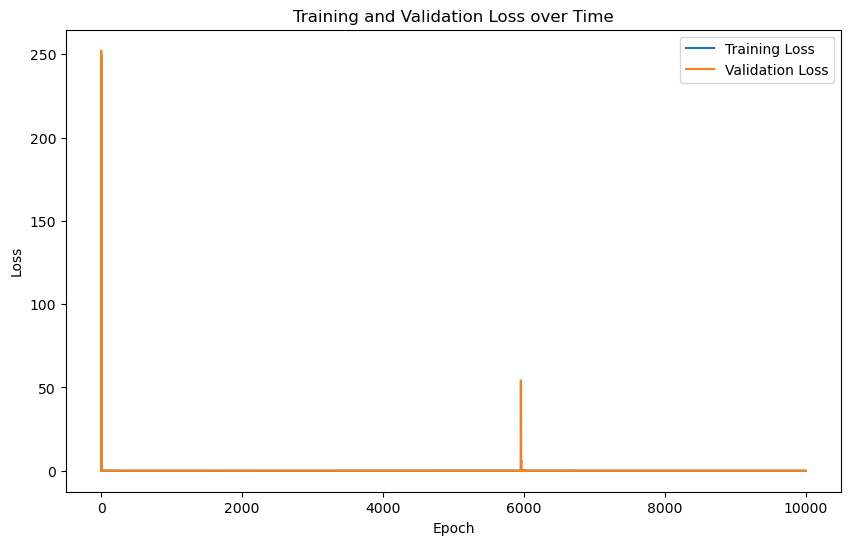

In [6]:
batch_size = 79
epochs = 10000
hidden_layer = 2000

model = Sequential()
model.add(LSTM(hidden_layer, input_shape=(n_past, n_features), return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer))
model.add(RepeatVector(n_future))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
model.summary()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Time')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


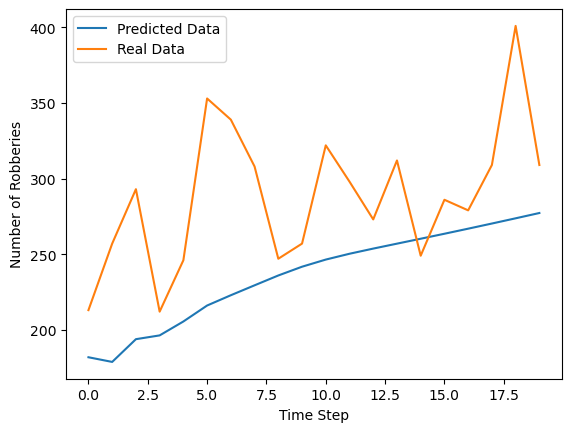

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


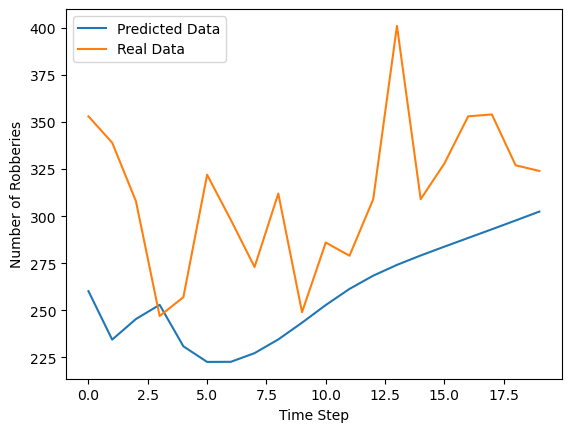

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


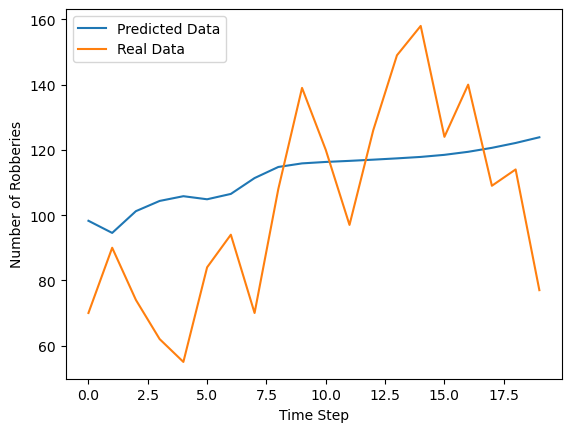

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


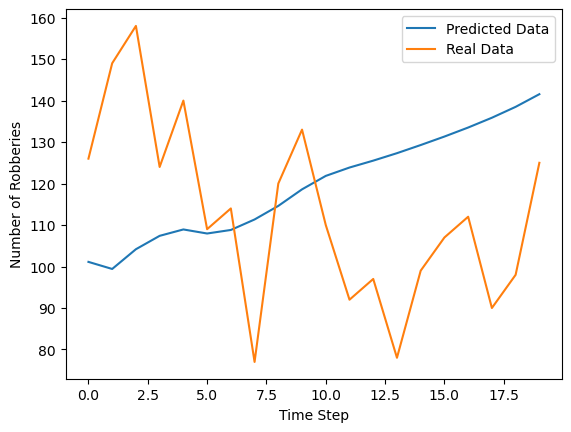

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


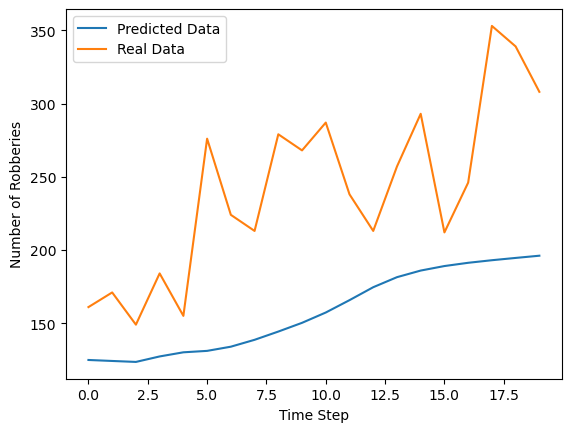

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


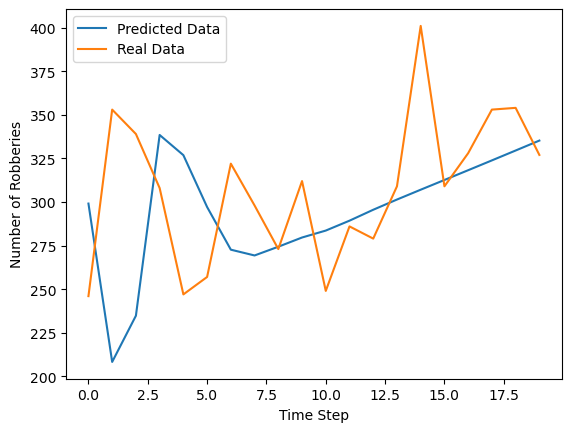

In [7]:
for i, x in enumerate(x_val):
    x = x.reshape(1,n_past,1)
    predicted = denormalize_data(model.predict(x)).flatten()
    real = denormalize_data(y_val[i].flatten())
    plt.plot(predicted, label='Predicted Data')
    plt.plot(real, label='Real Data')
    plt.xlabel('Time Step')
    plt.ylabel('Number of Robberies')
    plt.legend()
    plt.show()